In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Imports

In [2]:
! pip install "transformers" "pytorch-lightning"

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4.2 MB 9.9 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 584 kB 47.4 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 84 kB 4.0 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6.6 MB 52.5 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 596 kB 38.1 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 409 kB 35.4 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 136 kB 53.4 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.1 MB 51.7 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà

In [3]:
import json
import pandas as pd
import numpy as np
import time
import heapq

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
%matplotlib inline 
from yellowbrick.cluster import KElbowVisualizer

In [4]:
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn as nn

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
# likes_path = "/content/drive/MyDrive/Tesi/easytour-likes-2022-03MAR-21.json"
# schede_path = "/content/drive/MyDrive/Tesi/easytour-schede-2022-03MAR-21.json"
# data_path = "/content/drive/MyDrive/Tesi/data.csv"

In [7]:
likes_path = "/content/drive/MyDrive/Tesi/kuriu-likes-apr.json"
schede_path = "/content/drive/MyDrive/Tesi/kuriu-schede-apr.json"
data_path = "/content/drive/MyDrive/Tesi/data-APR.csv"

In [8]:
df_schede = pd.read_json(schede_path)
df_likes = pd.read_json(likes_path)
data = pd.read_csv(data_path, encoding_errors='ignore')  

In [9]:
categories = ["aria aperta", "cultura", "food", "sport", "tempo libero", "viaggi"]

In [10]:
df_schede_fields = df_schede[["id","userId", "title", "description", "duration", "datePublishing", "creationDate", "counterUseful", "categories", "viewCounter"]]
df_likes_ids = df_likes[["id", "userId"]]

In [11]:
df_schede

id  userId              userName documentType  \
0     62355f98272ae5672fbc3ac7     632  Forestlife Adventure   experience   
1     620aa536ff8ae67f37cafb06     442            lollo_cata   experience   
2     622c3b8ac992ca28f33c7f21     571       tiportoviaconme   experience   
3     620a90c8ff8ae67f37caf97f     530              GessicaM   experience   
4     622c398cc992ca28f33c7edd     571       tiportoviaconme   experience   
...                        ...     ...                   ...          ...   
4642  620c32db25398565dadb5867     570               gru1977   experience   
4643  6213b3460f41f86438b07d9c     429                 Elle_   experience   
4644  6207b9cdb1d0940f122580b7     570               gru1977   experience   
4645  61f6a3e3306802033034d576     536                Dierre   experience   
4646  620a132eb1d0940f1225a161     570               gru1977   experience   

                                                  title  \
0                          Spiagge selvagge a Phuket üáπüá≠   
1                                  Accarezzare le tigri   
2             Escursione al tramonto a Pidurangala Rock   
3                                             Koh Samui   
4     Visita al sito archeologico di Dambulla, Sri L...   
...                                                 ...   
4642              San Pedro, San Rafael, San Antonio üá®üá¥   
4643               Machu Picchu, meraviglia del mondo     
4644                       Tutti i colori di Guatap√© üá®üá¥   
4645         Avventura in Ecuador - Quilotoa e Cotopaxi   
4646      Santa Fe, la vecchia capitale di Antioquia üá®üá¥   

                                            description  \
0     Phuket, il paradiso per gli amanti del sole, d...   
1     So che dietro queste cose c‚Äô√® spesso del marci...   
2     Nel cuore dello Sri Lanka, nella zona centrale...   
3     Dopo il tour di Bangkok vi parler√≤ del belliss...   
4     Lo Sri Lanka √® un paese molto vario e in poco ...   
...                                                 ...   
4642  San Pedro de los Milagros si trova a nord di M...   
4643  √à l‚Äôalba, ma la realt√† √® che in questo viaggio...   
4644  Guatap√© √® un‚Äôesplosione di colori. Non conosco...   
4645  Continuiamo il nostro viaggio sempre a bordo d...   
4646  Santa Fe de Antioquia fu fondata dal marescial...   

                                              locations feature   duration  \
0     [{'photoReference': 'Aap_uEDKOn5xZw8whBhgYdkkO...      []          0   
1     [{'photoReference': 'Aap_uEBCcOt7F8m6JNGvUZJOR...      []   10800000   
2     [{'photoReference': 'Aap_uECE8sfZDs45_vO9P4A-D...      []          0   
3     [{'photoReference': 'Aap_uECK2Ukxa6hFFTuOwt8N4...      []    3600000   
4     [{'photoReference': 'Aap_uEDcSmwdHtmkJrymQsTW0...      []          0   
...                                                 ...     ...        ...   
4642  [{'photoReference': 'Aap_uECmYvam4yQCA0umcZcio...      []  194400000   
4643  [{'photoReference': 'Aap_uEASvi2g7Xd91-_ojmvmi...      []   21600000   
4644  [{'photoReference': 'Aap_uEABRi48_gTXe1ygfa22O...      []   72000000   
4645  [{'photoReference': 'Aap_uEDqUxLW0ailxbdNMwzk7...      []  172800000   
4646  [{'photoReference': 'Aap_uEBAtIETllvbyu36wXpeL...      []   64800000   

                       imageId  ...                   videoId  version  \
0     62355c31272ae5672fbc3a9d  ...                      None        2   
1     620aa384ff8ae67f37cafaf9  ...                      None        4   
2     622c39dfc992ca28f33c7ef6  ...                      None        2   
3     620a9065ff8ae67f37caf956  ...  620a90c5ff8ae67f37caf966        4   
4     622c387ec992ca28f33c7e71  ...                      None        2   
...                        ...  ...                       ...      ...   
4642  620c31a325398565dadb5857  ...                      None        4   
4643  6213b3000f41f86438b07cad  ...  6213b3000f41f86438b07cb2        3   
4644  6207b971b1d0940f122580af  ...        

In [12]:
data

id  userId  \
0     62355f98272ae5672fbc3ac7     632   
1     620aa536ff8ae67f37cafb06     442   
2     622c3b8ac992ca28f33c7f21     571   
3     620a90c8ff8ae67f37caf97f     530   
4     622c398cc992ca28f33c7edd     571   
...                        ...     ...   
4642  620c32db25398565dadb5867     570   
4643  6213b3460f41f86438b07d9c     429   
4644  6207b9cdb1d0940f122580b7     570   
4645  61f6a3e3306802033034d576     536   
4646  620a132eb1d0940f1225a161     570   

                                                  title  \
0                    ['spiaggia', 'phuket', 'thailand']   
1                                              ['tigr']   
2      ['escursion', 'tramonto', 'pidurangala', 'rock']   
3                                      ['koh', 'samui']   
4        ['visita', 'sito', 'dambulla', 'sri', 'lanka']   
...                                                 ...   
4642  ['san', 'pedro', 'san', 'rafael', 'san', 'anto...   
4643                  ['machu', 'picchu', 'meraviglia']   
4644                   ['color', 'guatap√©', 'colombia']   
4645   ['avventura', 'ecuador', 'quilotoa', 'cotopaxi']   
4646  ['santa', 'fe', 'capital', 'antioquia', 'colom...   

                                            description   duration  \
0     ['phuket', 'paradiso', 'amant', 'sole', 'mare'...          0   
1     ['marcio', 'maltrattamento', 'animal', 'andar'...   10800000   
2     ['cuor', 'sri', 'lanka', 'zona', 'interess', '...          0   
3     ['tour', 'bangkok', 'arcipelago', 'koh', 'samu...    3600000   
4     ['sri', 'lanka', 'poter', 'mare', 'passeggiata...          0   
...                                                 ...        ...   
4642  ['san', 'pedro', 'de', 'lo', 'milagro', 'nord'...  194400000   
4643  ['alba', 'realt√†', 'viaggio', 'rumor', 'cascat...   21600000   
4644  ['guatap√©', 'esplosion', 'color', 'maniera', '...   72000000   
4645  ['viaggio', 'bordo', 'pulman', 'bussola', 'via...  172800000   
4646  ['santa', 'fe', 'de', 'antioquia', 'maresciall...   64800000   

                datePublishing                   creationDate  counterUseful  \
0     2022-03-19T04:44:09.503Z  2022-03-19T04:44:08.000+00:00              0   
1     2022-02-14T20:05:09.586Z  2022-02-14T18:53:42.000+00:00              0   
2     2022-03-12T06:19:55.882Z  2022-03-12T06:19:54.000+00:00              1   
3     2022-02-16T15:15:51.387Z  2022-02-14T17:26:32.000+00:00              0   
4     2022-03-12T06:11:25.746Z  2022-03-12T06:11:24.000+00:00              1   
...                        ...                            ...            ...   
4642  2022-03-02T16:28:47.197Z  2022-02-15T23:10:19.000+00:00              0   
4643  2022-02-21T15:44:06.580Z  2022-02-21T15:44:06.000+00:00              0   
4644  2022-03-02T16:27:30.221Z  2022-02-12T13:44:45.000+00:00              0   
4645  2022-01-30T14:43:17.547Z  2022-01-30T14:42:43.000+00:00              1   
4646  2022-03-02T16:27:55.102Z  2022-02-14T08:30:38.000+00:00              0   

           categories  viewCounter  aria aperta  cultura  food  sport  \
0          ['Viaggi']            7            0        0     0      0   
1          ['Viaggi']          419            0        0     0      0   
2     ['Aria aperta']           24            1        0     0      0   
3          ['Viaggi']          453            0        0     0      0   
4          ['Viaggi']           12            0        0     0      0   
...               ...          ...          ...      ...   ...    ...   
4642       ['Viaggi']           39            0        0     0      0   
4643       ['Viaggi']           41            0        0     0      0   
4644       ['Viaggi']           52            0        0     0      0   
4645       ['Viaggi']           43            0        0     0      0   
4646       ['Viaggi']           36            0        0     0      0   

      tempo libero  viaggi  duration_min  days  
0                0       1           0.0    31  
1                0       1        

# Tf-Idf

In [ ]:
def compute_tfidf_on_whole_dataset(data):
  tfidf_vectorizer = TfidfVectorizer(lowercase=False,
                                          min_df=5,
                                          max_df=0.10)
  # description and title are put together
  text = data['description'] + data['title']
  tfidf_schede = tfidf_vectorizer.fit_transform(text)
  dense_text = tfidf_schede.todense()
  denselist_text = dense_text.tolist()

  dataset_text_tfidf = pd.DataFrame(denselist_text, index=data.index,
                                    columns=tfidf_vectorizer.get_feature_names())

  return dataset_text_tfidf

In [ ]:
df_tfidf = compute_tfidf_on_whole_dataset(data)
df_tfidf

In [ ]:
def compute_tfidf_single_category(data, category:str):
  tfidf_vectorizer = TfidfVectorizer(lowercase=False,
                                          min_df=5,
                                          max_df=0.10)
  # description and title are put together
  data_category = data[data[category]!=0]
  text = data_category['description'] + data_category['title']
  tfidf_schede = tfidf_vectorizer.fit_transform(text)
  dense_text = tfidf_schede.todense()
  denselist_text = dense_text.tolist()

  dataset_text_tfidf = pd.DataFrame(denselist_text, index=data_category.index,
                                    columns=tfidf_vectorizer.get_feature_names())

  return dataset_text_tfidf

In [ ]:
tfidf_dict = dict()
for c in categories:
  tfidf_dict[c] = compute_tfidf_single_category(data, category=c)

In [ ]:
tfidf_dict["food"]

# Transformers

Descriptions are often too long to be fed to BERT, so, after getting the tokens ids, split a description into chunks of length 510, add [CLS] and [SEP] tokens and feed the model with one chunk at the time. At the end compute the average of the chunks and keep just the [CLS] embedding. 

In [ ]:
from math import ceil
from tqdm import tqdm

In [ ]:
device = 0
if torch.cuda.is_available():    
    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla K80


In [ ]:
class MyTransformer():
    def __init__(
            self,
            pretrained_model_name_or_path: str = "dbmdz/bert-base-italian-cased",
            device: str = 'cpu'
    ):
        super().__init__()
        self.tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path)
        self.model = AutoModel.from_pretrained(pretrained_model_name_or_path)
        self.model.to(device)
        print("Device used: {}".format(self.model.device))

    def add_special_tokens(self, tokens_ids):
      # add CLS (token_id is 101) and SEP (token_id is 102)
      ids = [101] + tokens_ids + [102]
      # add padding (token_id is 0)
      padding_length = 512-len(ids)
      for i in range(padding_length):
        ids += [0]
      #print("\n padding_length: {} - len(tokens_ids): {}\nTokens_ids: {}".format(padding_length, len(ids), ids))
      return ids

    def compute_embedding(self, tokens_ids):
      self.model.eval()
      with torch.no_grad():
        if(len(tokens_ids) <= 510):
          tokens_ids = self.add_special_tokens(tokens_ids)
          context_embeddings = self.model(torch.tensor(tokens_ids)[None,:].to(device))[0]
        else:
          k = ceil(len(tokens_ids) / 510.0)
          chunks = np.array_split(tokens_ids, k)
          for i in range(len(chunks)):
            chunks[i] = self.add_special_tokens(chunks[i].tolist())
          chunks_tensor = torch.tensor(chunks[0])[None,:].to(device)
          context_embeddings_list = self.model(chunks_tensor)[0].to(device)
          for i in range(1, len(chunks)):
            chunks_tensor = torch.tensor(chunks[i])[None,:].to(device)
            context_embeddings_list = torch.cat((context_embeddings_list, self.model(chunks_tensor)[0]), 1)
          dim = context_embeddings_list.shape[-1]
          context_embeddings = context_embeddings_list.to(device)
        #compute the average of the vectors
        avg_embeddings = torch.sum(context_embeddings,1)[0]
      return avg_embeddings

    def encode(self, data, docs, categories:list):
        start = time.time()
        encodings_dict = dict()
        for c in categories:
          print("Getting embeddings for class {}".format(c))
          encodings = []
          data_category_index = data[data[c]!=0].index
          filtered_docs = docs.filter(data_category_index, axis=0)
          for _, d in tqdm(enumerate(filtered_docs)): 
            if not d: #df_schede has null descriptions
              print("In category {} there is an empty scheda".format(c))
              empty_embedding = torch.zeros(768).to(device)
              encodings.append(empty_embedding)
              continue
            t = self.tokenizer.tokenize(d)
            tokens_ids = self.tokenizer.convert_tokens_to_ids(t)
            encodings.append(self.compute_embedding(tokens_ids))
          encodings_dict[c] = encodings 
        print("\nTime needed to encode {} documents: {}s".format(len(docs), time.time()-start))
        return encodings_dict

    def text_tokens_length(self, docs):
      res = 0
      N = len(docs) #number of docs
      max = 0
      longer_than_510 = 0
      for idx, d in tqdm(enumerate(docs)): 
        if not d: #df_schede has one null description
          N -= 1
          continue
        t = self.tokenizer.tokenize(d)
        length = len(t)
        res += length
        if length>max:
          max=length
        if length > 510:
          longer_than_510 += 1
      print("\nAverage number of tokens is {}\nMax number of tokens is {}\nNumber of sequences than have more than 510 tokens is {}".format(res/N, max, longer_than_510))

In [ ]:
model = MyTransformer(device=device)
#model.text_tokens_length(df_schede.description)
embeddings = model.encode(data, df_schede.description, categories)
#embeddings = model.encode(data, df_schede.title, categories)

Downloading:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/433 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/230k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/422M [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-base-italian-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Device used: cuda:0
Getting embeddings for class aria aperta


1it [00:00,  5.63it/s]Token indices sequence length is longer than the specified maximum sequence length for this model (630 > 512). Running this sequence through the model will result in indexing errors
738it [01:04, 11.44it/s]


Getting embeddings for class cultura


792it [01:02, 12.71it/s]


Getting embeddings for class food


1191it [01:33, 12.69it/s]


Getting embeddings for class sport


2it [00:00, 19.64it/s]

In category sport there is an empty scheda


326it [00:26, 12.50it/s]


Getting embeddings for class tempo libero


18it [00:01, 14.46it/s]

In category tempo libero there is an empty scheda


522it [00:38, 13.71it/s]


Getting embeddings for class viaggi


934it [01:26, 10.77it/s]


Time needed to encode 4647 documents: 371.62997484207153s


In [ ]:
embeddings_path = "/content/drive/MyDrive/Tesi/embeddings_"
for c in categories:
  category_path = embeddings_path + c + ".pt"
  torch.save(embeddings[c], category_path)

In [ ]:
embeddings_from_file = {}
for c in categories:
  category_path = embeddings_path + c + ".pt"
  embeddings_from_file[c] = torch.load(category_path)

# Recommender systems

In [13]:
df_likes_ids.userId.drop_duplicates().isin(data.userId.drop_duplicates())

0        True
1        True
2        True
3        True
6        True
        ...  
1092     True
1154     True
1221    False
1292    False
1384     True
Name: userId, Length: 99, dtype: bool

In [14]:
#list of users, some ids in likes are not in posts -> some users liked posts but not posted one
users = pd.concat([df_likes_ids.userId, data.userId]).drop_duplicates() 
#list of posts' id
posts = data.id
#list of users and posts they made
users_posts = data.groupby("userId").id.apply(list)
#list of posts and users that liked that post
posts_with_likes = df_likes_ids.groupby("id").userId.apply(list)
#list of users and posts they liked
users_with_likes = df_likes_ids.groupby("userId").id.apply(list)
#users that have not posted anything
users_without_posts = users[~users.isin(users_posts.index)].values
#users that did not like any posts
users_without_likes_made = users[~users.isin(users_with_likes.index)].values
#posts that did not receive any likes
posts_without_likes = posts[~posts.isin(posts_with_likes.index)].values

print("Total number of users: {}".format(len(users)))
print("Number of posts: {}".format(len(posts)))
print("Number of users that posted something: {}".format(len(users_posts)))
print("Number of posts that received likes: {}".format(len(posts_with_likes)))
print("Total number of likes: {}".format(posts_with_likes.str.len().sum())) 
print("Number of users that liked posts: {}".format(len(users_with_likes)))
print("Number of users that not posted anything: {}".format(len(users_without_posts)))
print("Number of users that not liked anything: {}".format(len(users_without_likes_made)))
print("Number of posts that not received likes: {}".format(len(posts_without_likes)))

Total number of users: 163
Number of posts: 4647
Number of users that posted something: 144
Number of posts that received likes: 1131
Total number of likes: 1475
Number of users that liked posts: 99
Number of users that not posted anything: 19
Number of users that not liked anything: 64
Number of posts that not received likes: 3516


In [15]:
data_with_ids = data.drop(columns=["datePublishing", "categories", "creationDate", "duration", "description", "title", "counterUseful", "viewCounter"])

In [16]:
#"duration_min", "days"
X = data.drop(columns=["id", "userId", "description","categories", "title", "datePublishing", "creationDate", "duration", "counterUseful", "viewCounter"])

In [17]:
X

aria aperta  cultura  food  sport  tempo libero  viaggi  duration_min  \
0               0        0     0      0             0       1           0.0   
1               0        0     0      0             0       1         180.0   
2               1        0     0      0             0       0           0.0   
3               0        0     0      0             0       1          60.0   
4               0        0     0      0             0       1           0.0   
...           ...      ...   ...    ...           ...     ...           ...   
4642            0        0     0      0             0       1        3240.0   
4643            0        0     0      0             0       1         360.0   
4644            0        0     0      0             0       1        1200.0   
4645            0        0     0      0             0       1        2880.0   
4646            0        0     0      0             0       1        1080.0   

      days  
0       31  
1       63  
2       38  
3       63  
4       38  
...    ...  
4642    62  
4643    56  
4644    65  
4645    78  
4646    64  

[4647 rows x 8 columns]

In [18]:
data

id  userId  \
0     62355f98272ae5672fbc3ac7     632   
1     620aa536ff8ae67f37cafb06     442   
2     622c3b8ac992ca28f33c7f21     571   
3     620a90c8ff8ae67f37caf97f     530   
4     622c398cc992ca28f33c7edd     571   
...                        ...     ...   
4642  620c32db25398565dadb5867     570   
4643  6213b3460f41f86438b07d9c     429   
4644  6207b9cdb1d0940f122580b7     570   
4645  61f6a3e3306802033034d576     536   
4646  620a132eb1d0940f1225a161     570   

                                                  title  \
0                    ['spiaggia', 'phuket', 'thailand']   
1                                              ['tigr']   
2      ['escursion', 'tramonto', 'pidurangala', 'rock']   
3                                      ['koh', 'samui']   
4        ['visita', 'sito', 'dambulla', 'sri', 'lanka']   
...                                                 ...   
4642  ['san', 'pedro', 'san', 'rafael', 'san', 'anto...   
4643                  ['machu', 'picchu', 'meraviglia']   
4644                   ['color', 'guatap√©', 'colombia']   
4645   ['avventura', 'ecuador', 'quilotoa', 'cotopaxi']   
4646  ['santa', 'fe', 'capital', 'antioquia', 'colom...   

                                            description   duration  \
0     ['phuket', 'paradiso', 'amant', 'sole', 'mare'...          0   
1     ['marcio', 'maltrattamento', 'animal', 'andar'...   10800000   
2     ['cuor', 'sri', 'lanka', 'zona', 'interess', '...          0   
3     ['tour', 'bangkok', 'arcipelago', 'koh', 'samu...    3600000   
4     ['sri', 'lanka', 'poter', 'mare', 'passeggiata...          0   
...                                                 ...        ...   
4642  ['san', 'pedro', 'de', 'lo', 'milagro', 'nord'...  194400000   
4643  ['alba', 'realt√†', 'viaggio', 'rumor', 'cascat...   21600000   
4644  ['guatap√©', 'esplosion', 'color', 'maniera', '...   72000000   
4645  ['viaggio', 'bordo', 'pulman', 'bussola', 'via...  172800000   
4646  ['santa', 'fe', 'de', 'antioquia', 'maresciall...   64800000   

                datePublishing                   creationDate  counterUseful  \
0     2022-03-19T04:44:09.503Z  2022-03-19T04:44:08.000+00:00              0   
1     2022-02-14T20:05:09.586Z  2022-02-14T18:53:42.000+00:00              0   
2     2022-03-12T06:19:55.882Z  2022-03-12T06:19:54.000+00:00              1   
3     2022-02-16T15:15:51.387Z  2022-02-14T17:26:32.000+00:00              0   
4     2022-03-12T06:11:25.746Z  2022-03-12T06:11:24.000+00:00              1   
...                        ...                            ...            ...   
4642  2022-03-02T16:28:47.197Z  2022-02-15T23:10:19.000+00:00              0   
4643  2022-02-21T15:44:06.580Z  2022-02-21T15:44:06.000+00:00              0   
4644  2022-03-02T16:27:30.221Z  2022-02-12T13:44:45.000+00:00              0   
4645  2022-01-30T14:43:17.547Z  2022-01-30T14:42:43.000+00:00              1   
4646  2022-03-02T16:27:55.102Z  2022-02-14T08:30:38.000+00:00              0   

           categories  viewCounter  aria aperta  cultura  food  sport  \
0          ['Viaggi']            7            0        0     0      0   
1          ['Viaggi']          419            0        0     0      0   
2     ['Aria aperta']           24            1        0     0      0   
3          ['Viaggi']          453            0        0     0      0   
4          ['Viaggi']           12            0        0     0      0   
...               ...          ...          ...      ...   ...    ...   
4642       ['Viaggi']           39            0        0     0      0   
4643       ['Viaggi']           41            0        0     0      0   
4644       ['Viaggi']           52            0        0     0      0   
4645       ['Viaggi']           43            0        0     0      0   
4646       ['Viaggi']           36            0        0     0      0   

      tempo libero  viaggi  duration_min  days  
0                0       1           0.0    31  
1                0       1        

In [19]:
df_schede

id  userId              userName documentType  \
0     62355f98272ae5672fbc3ac7     632  Forestlife Adventure   experience   
1     620aa536ff8ae67f37cafb06     442            lollo_cata   experience   
2     622c3b8ac992ca28f33c7f21     571       tiportoviaconme   experience   
3     620a90c8ff8ae67f37caf97f     530              GessicaM   experience   
4     622c398cc992ca28f33c7edd     571       tiportoviaconme   experience   
...                        ...     ...                   ...          ...   
4642  620c32db25398565dadb5867     570               gru1977   experience   
4643  6213b3460f41f86438b07d9c     429                 Elle_   experience   
4644  6207b9cdb1d0940f122580b7     570               gru1977   experience   
4645  61f6a3e3306802033034d576     536                Dierre   experience   
4646  620a132eb1d0940f1225a161     570               gru1977   experience   

                                                  title  \
0                          Spiagge selvagge a Phuket üáπüá≠   
1                                  Accarezzare le tigri   
2             Escursione al tramonto a Pidurangala Rock   
3                                             Koh Samui   
4     Visita al sito archeologico di Dambulla, Sri L...   
...                                                 ...   
4642              San Pedro, San Rafael, San Antonio üá®üá¥   
4643               Machu Picchu, meraviglia del mondo     
4644                       Tutti i colori di Guatap√© üá®üá¥   
4645         Avventura in Ecuador - Quilotoa e Cotopaxi   
4646      Santa Fe, la vecchia capitale di Antioquia üá®üá¥   

                                            description  \
0     Phuket, il paradiso per gli amanti del sole, d...   
1     So che dietro queste cose c‚Äô√® spesso del marci...   
2     Nel cuore dello Sri Lanka, nella zona centrale...   
3     Dopo il tour di Bangkok vi parler√≤ del belliss...   
4     Lo Sri Lanka √® un paese molto vario e in poco ...   
...                                                 ...   
4642  San Pedro de los Milagros si trova a nord di M...   
4643  √à l‚Äôalba, ma la realt√† √® che in questo viaggio...   
4644  Guatap√© √® un‚Äôesplosione di colori. Non conosco...   
4645  Continuiamo il nostro viaggio sempre a bordo d...   
4646  Santa Fe de Antioquia fu fondata dal marescial...   

                                              locations feature   duration  \
0     [{'photoReference': 'Aap_uEDKOn5xZw8whBhgYdkkO...      []          0   
1     [{'photoReference': 'Aap_uEBCcOt7F8m6JNGvUZJOR...      []   10800000   
2     [{'photoReference': 'Aap_uECE8sfZDs45_vO9P4A-D...      []          0   
3     [{'photoReference': 'Aap_uECK2Ukxa6hFFTuOwt8N4...      []    3600000   
4     [{'photoReference': 'Aap_uEDcSmwdHtmkJrymQsTW0...      []          0   
...                                                 ...     ...        ...   
4642  [{'photoReference': 'Aap_uECmYvam4yQCA0umcZcio...      []  194400000   
4643  [{'photoReference': 'Aap_uEASvi2g7Xd91-_ojmvmi...      []   21600000   
4644  [{'photoReference': 'Aap_uEABRi48_gTXe1ygfa22O...      []   72000000   
4645  [{'photoReference': 'Aap_uEDqUxLW0ailxbdNMwzk7...      []  172800000   
4646  [{'photoReference': 'Aap_uEBAtIETllvbyu36wXpeL...      []   64800000   

                       imageId  ...                   videoId  version  \
0     62355c31272ae5672fbc3a9d  ...                      None        2   
1     620aa384ff8ae67f37cafaf9  ...                      None        4   
2     622c39dfc992ca28f33c7ef6  ...                      None        2   
3     620a9065ff8ae67f37caf956  ...  620a90c5ff8ae67f37caf966        4   
4     622c387ec992ca28f33c7e71  ...                      None        2   
...                        ...  ...                       ...      ...   
4642  620c31a325398565dadb5857  ...                      None        4   
4643  6213b3000f41f86438b07cad  ...  6213b3000f41f86438b07cb2        3   
4644  6207b971b1d0940f122580af  ...        

## **Method \#1**

**Method #1:** Recommend posts that are similar to the ones that the user liked -> use cosine similarity on tf-idf

In [ ]:
cosine_sim = cosine_similarity(df_tfidf, df_tfidf)

In [ ]:
def get_recommendations(user_id: int):
    # Get the index of the user that we want to recommend posts to
    user_id_idx = df_schede[df_schede == user_id].index[0]
    # Get the pairwise similarity scores of all posts with that user
    sim_scores = list(enumerate(cosine_sim[user_id_idx]))
    # Sort the posts based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores of the 5 most similar posts
    sim_scores = sim_scores[1:6]
    # Get the blog post ids
    post_ids = [i[0] for i in sim_scores]
    # Return the blog posts
    return df_schede.iloc[post_ids]

def print_recommendations(recommended_posts):
    for i in range(len(recommended_posts)):
        print("Post #" + str(i+1) + ":")
        print("Post ID: " + str(recommended_posts.iloc[i].id))
        print("Title: " + str(recommended_posts.iloc[i].title))
        print("Description: " + str(recommended_posts.iloc[i].description))
        print("\n")

In [ ]:
id = 632
#print("Posts that user {} liked:".format(id))
liked_posts = df_likes_ids[df_likes_ids["userId"] == id]
#print(liked_posts)
print("Posts:")
for _,p in liked_posts.iterrows():
    post = df_schede[df_schede["id"]== p["id"]]
    if not post.description.empty:
        print(post.title)
        print("-"*100)

Posts:
193    Bemo - immergiti nella vita locale indonesiana
Name: title, dtype: object
----------------------------------------------------------------------------------------------------
353    Pomeriggio nel villaggio arcobaleno in Indonesia
Name: title, dtype: object
----------------------------------------------------------------------------------------------------


In [ ]:
recommended_posts = get_recommendations(id)
print_recommendations(recommended_posts)

Post #1:
Post ID: 620abb33ff8ae67f37cafe3c
Title: Freedom beach
Description: Forse la spiaggia pi√π bella di tutta l‚Äôisola di phuket! Freedom beach si trova vicino la spiaggia di patong ed √® possibile raggiungerla solo via mare perch√© √® abbastanza complicato arrivarci via terra, per la foresta che circonda la spiaggia! Proprio per questo nella spiaggia vicina troverete che fanno servizio taxi, tanti locali che vi porteranno sulla spiaggia in barca e aspetteranno li in barca mentre voi vi godete la giornata di sole e farete il bagno nell‚Äôacqua cristallina dell‚Äôoceano!


Post #2:
Post ID: 620265bd86f56a61f97d4145
Title: Waimanalo Beach, una delle spiagge pi√π belle
Description: Ho un debole per le spiagge, specialmente quelle di sabbia bianca e sottile e l'acqua azzurra.

La spiaggia di Waimanalo, a sud est dell'isola di Oahu, alle Hawaii, rispecchia perfettamente questa descrizione, facendola entrare tra le mie spiagge preferite di tutti i tempi.

E quando parlo di acqua azzurr

## **Method \#2**

**Method #2:** Similarity of users is given by the number of common clusters for the posts they made or liked 

### K-means

In [ ]:
#Plot data using SVD
def plot_with_SVD(data:pd.DataFrame, categories:list, description_dict:dict):
  svd_dict = dict()
  for c in categories:
    data_category = data[data[c]!=0]
    descriptions_encodings = pd.DataFrame(description_dict[c], index=data_category.index)
    data_category.drop(columns=categories, inplace=True)
    data_with_encodings = pd.concat([data_category, descriptions_encodings], axis=1, ignore_index=True)
    print("Data dimension: {}".format(data_with_encodings.shape))
    svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
    svd = svd.fit_transform(data_with_encodings)
    svd_dict[c] = svd
    plt.scatter(svd[:,0], svd[:,1])
    plt.title("Category: " + c)
    plt.show()
  return svd_dict

Data dimension: (738, 1600)


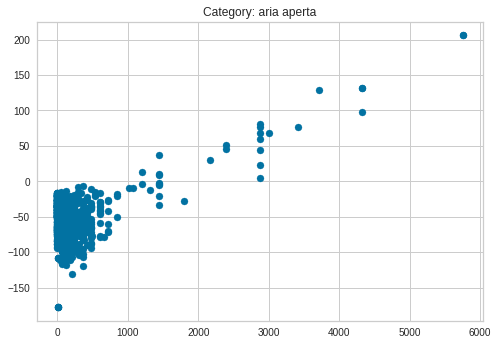

Data dimension: (792, 1624)


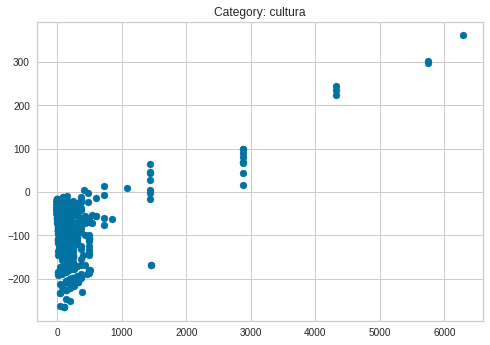

Data dimension: (1191, 2082)


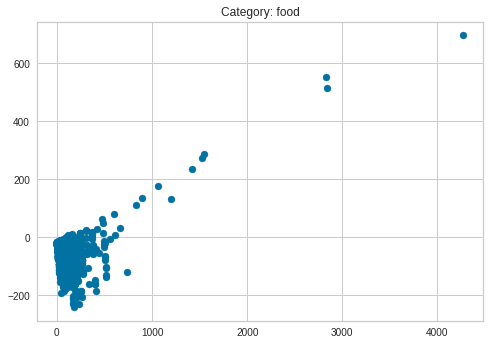

Data dimension: (326, 666)


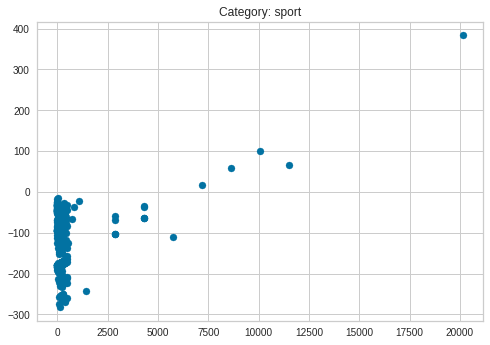

Data dimension: (522, 962)


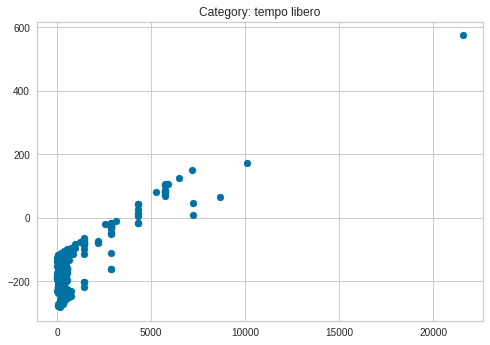

Data dimension: (934, 2119)


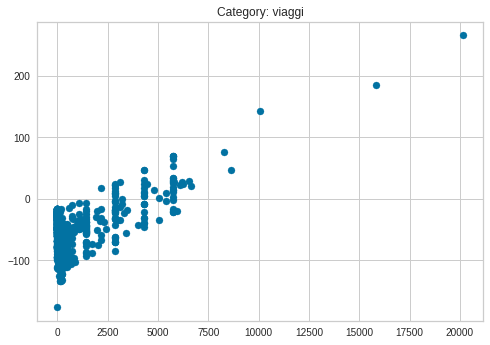

In [ ]:
svd_dict_tfidf = plot_with_SVD(X, categories, tfidf_dict)

Data dimension: (738, 770)


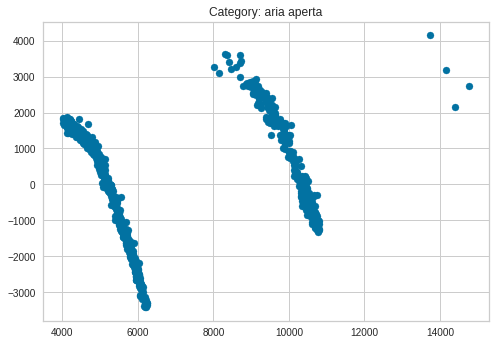

Data dimension: (792, 770)


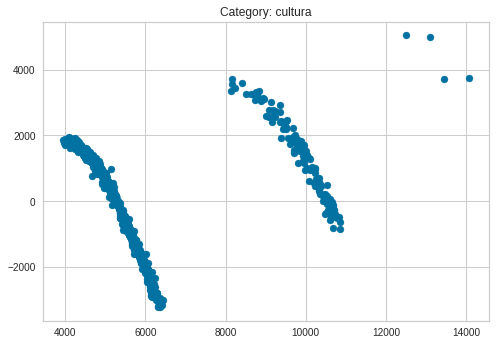

Data dimension: (1191, 770)


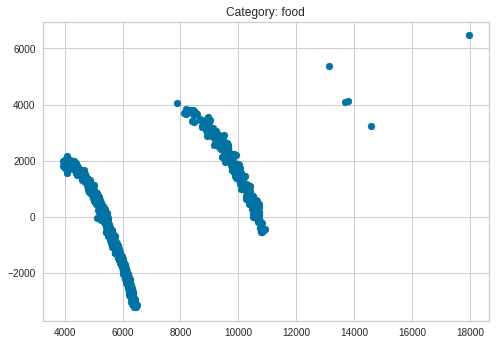

Data dimension: (326, 770)


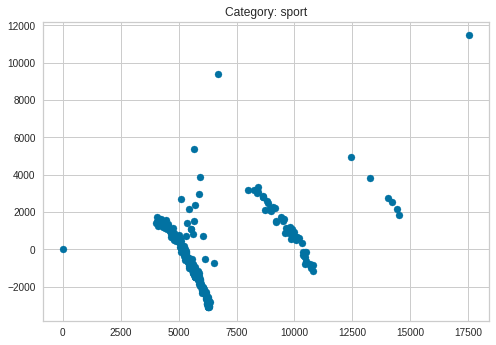

Data dimension: (522, 770)


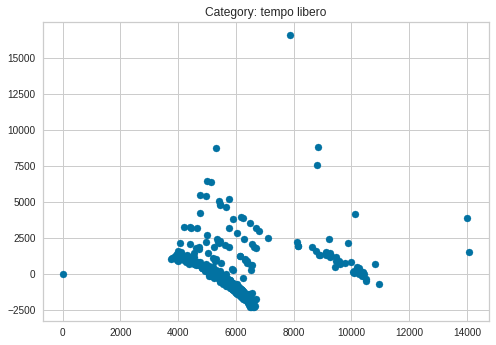

Data dimension: (934, 770)


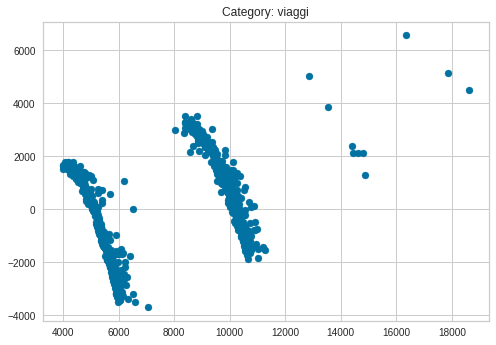

In [ ]:
svd_dict_embeddings = plot_with_SVD(X, categories, embeddings)

In [ ]:
#Plot results
def plotKMeans(label:np.ndarray, df:pd.DataFrame, category:str):
  u_labels = np.unique(label)
  for i in u_labels:
      plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
  plt.title('K-means with {} clusters for {}'.format(len(u_labels), category))
  plt.legend()
  plt.show()

In [ ]:
def kmeans_tests(data:pd.DataFrame, category:str, svd_dict:dict, clusters_number:int=10, steps:int=1):
  inertia = []
  times = dict() #{k:time_needed}
  K = range(2,clusters_number,steps) 
  for k in K:
      #Fit 
      start = time.time()
      kmeanModel = KMeans(n_clusters=k)
      kmeans = kmeanModel.fit(data)
      time_needed = time.time() - start
      times[k] = time_needed
      #Elbow
      inertia.append(kmeanModel.inertia_)
      #Clusters
      label = kmeans.predict(data)
      plotKMeans(label, svd_dict[category], category)
  return inertia, times, K

In [ ]:
def elbow_and_statistics(inertia:list, times:dict, K:list):
  #Elbow
  plt.figure(figsize=(10,3))
  plt.plot(K, inertia, 'bx-')
  plt.xlabel('k')
  plt.ylabel('Inertia')
  plt.title('The Elbow Method showing the optimal k')
  plt.show()
  print("\n")
  #Inertia
  for k,value in zip(K, inertia):
    print("Inertia for {} clusters is: {}".format(k,value))
  print("\n")
  #Times needed
  for k,v in times.items():
    print("Time needed to fit kmeans with {} clusters is: {}".format(k,v))

In [ ]:
def elbow_visualizer(data:pd.DataFrame, k:int):
  model = KMeans()
  visualizer = KElbowVisualizer(model, k=k)
  visualizer.fit(data)        
  visualizer.show() 

In [ ]:
def kmeans_computation(data:pd.DataFrame, description_dict:dict, categories:list, svd:dict, k:int, visualizer:bool=False):
  assert type(categories)==list, "Expected list as input not {}".format(type(categories))
  for c in categories:
    print("Category: {}".format(c))
    data_category = data[data[c]!=0]
    descriptions_encodings = pd.DataFrame(description_dict[c], index=data_category.index)
    data_category.drop(columns=categories, inplace=True)
    data_with_encodings = pd.concat([data_category, descriptions_encodings], axis=1, ignore_index=True)
    if visualizer:
      #kmeans
      inertia, times, K = kmeans_tests(data_with_encodings, c, svd, k)
      # Elbow and inertia
      elbow_and_statistics(inertia, times, K)
    else:
      elbow_visualizer(data_with_encodings, k)  

Category: aria aperta


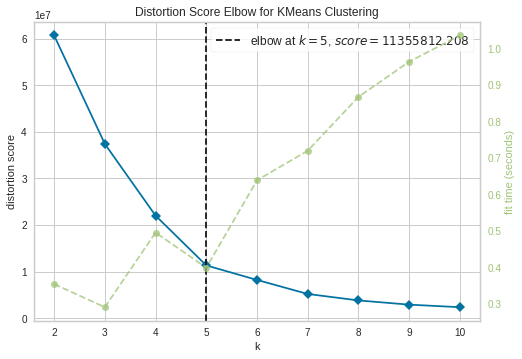

Category: cultura


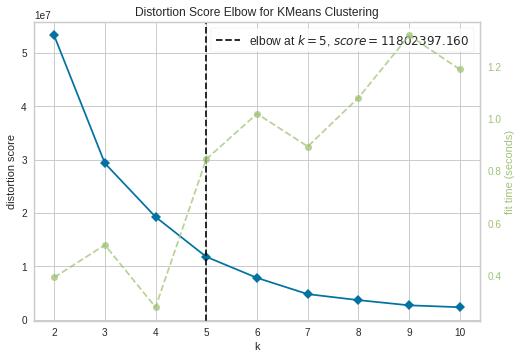

Category: food


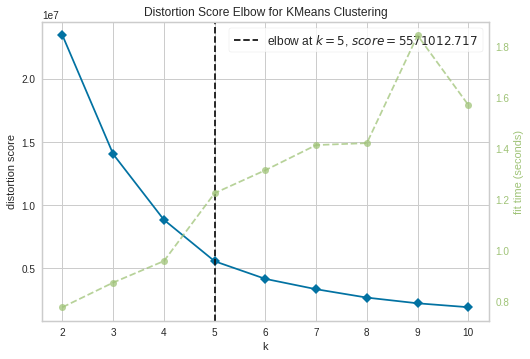

Category: sport


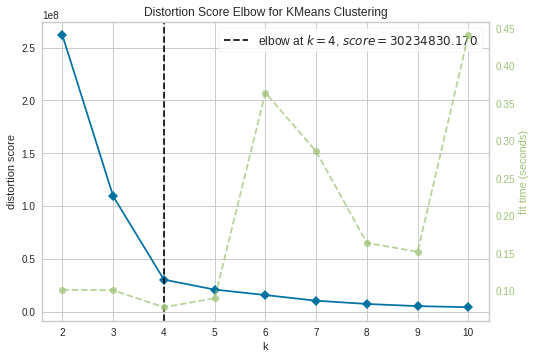

Category: tempo libero


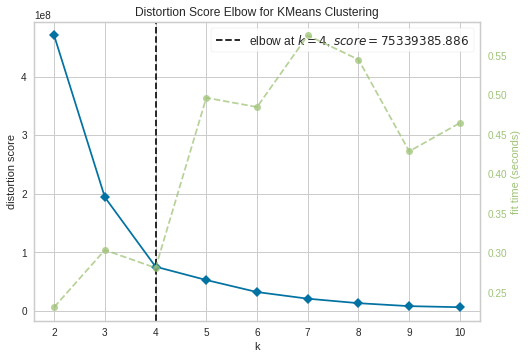

Category: viaggi


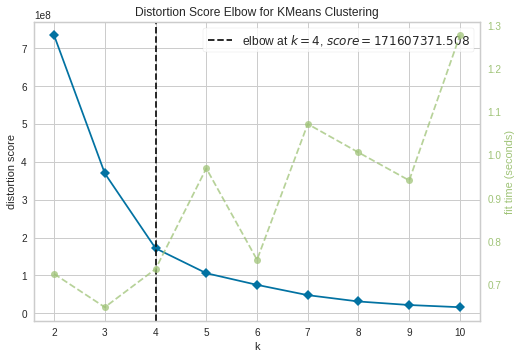

In [ ]:
kmeans_computation(X, tfidf_dict, categories, svd_dict_tfidf, 10)

Category: aria aperta


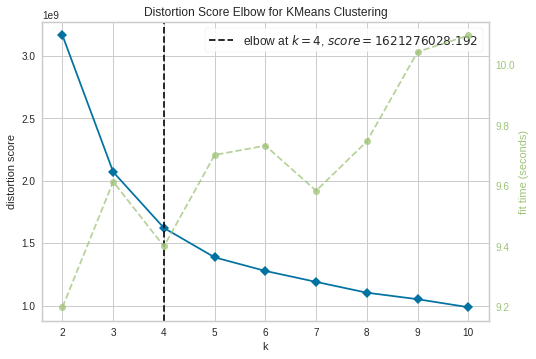

Category: cultura


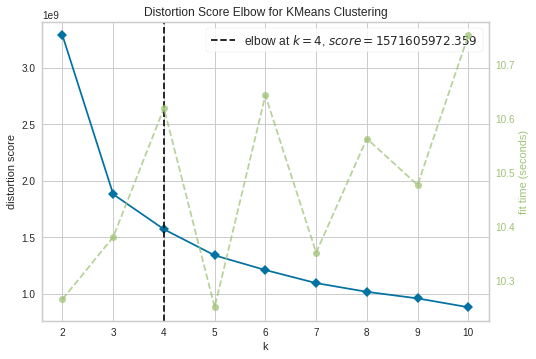

Category: food


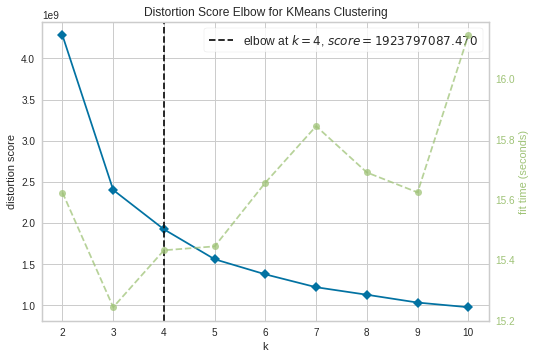

Category: sport


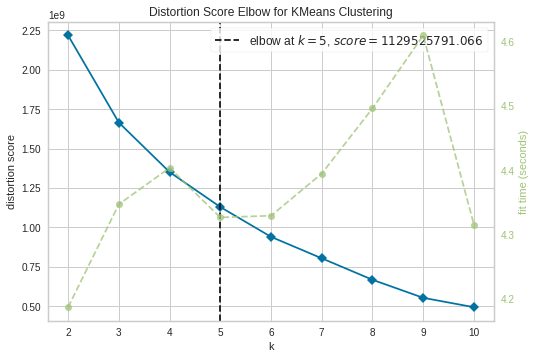

Category: tempo libero


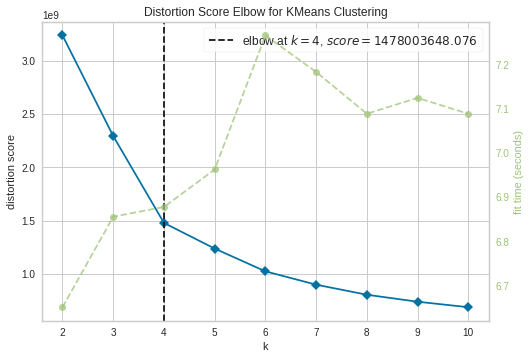

Category: viaggi


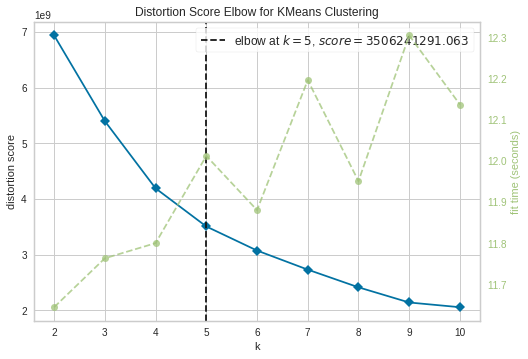

In [ ]:
kmeans_computation(X, embeddings, categories, svd_dict_embeddings, 10)

### DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from collections import Counter

In [ ]:
def plot_dbscan(data:pd.DataFrame, labels:np.ndarray, core_samples_mask:np.ndarray, n_clusters_:int):  
  unique_labels = set(labels)
  colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
  for k, col in zip(unique_labels, colors):
      if k == -1:
          # Black used for noise.
          col = [0, 0, 0, 1]

      data_array = data.to_numpy()
      class_member_mask = labels == k
      xy = data_array[class_member_mask & core_samples_mask]
      plt.plot(
          xy[:, 0],
          xy[:, 1],
          "o",
          markerfacecolor=tuple(col),
          markeredgecolor="k",
          markersize=14,
      )

      xy = data_array[class_member_mask & ~core_samples_mask]
      plt.plot(
          xy[:, 0],
          xy[:, 1],
          "o",
          markerfacecolor=tuple(col),
          markeredgecolor="k",
          markersize=6,
      )

  plt.title("Estimated number of clusters: %d" % n_clusters_)
  plt.show()

In [ ]:
def DBSCAN_categories(data:pd.DataFrame, categories:list, description_dict:dict, plot:bool=False):
  dbscan_dict = dict()
  for c in categories:
    data_category = data[data[c]!=0]
    descriptions_encodings = pd.DataFrame(description_dict[c], index=data_category.index)
    data_category.drop(columns=categories, inplace=True)
    data_with_encodings = pd.concat([data_category, descriptions_encodings], axis=1, ignore_index=True)
    clustering = DBSCAN(eps=10, min_samples=10).fit(data_with_encodings)
    dbscan_dict[c] = clustering
    labels = clustering.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    counter = Counter(labels)
    counter = dict(sorted(counter.items(), key=lambda item: item[1], reverse=True))
    print("Category '{}' has {} clusters and {} noisy points\nDistribution of the samples in the clusters: {}\n".format(c, n_clusters_, n_noise_, counter))
    if plot:
      core_samples_mask = np.zeros_like(labels, dtype=bool)
      core_samples_mask[clustering.core_sample_indices_] = True
      plot_dbscan(data_with_encodings, labels, core_samples_mask, n_clusters_)
  return dbscan_dict

Category 'aria aperta' has 9 clusters and 226 noisy points
Distribution of the samples in the clusters: {0: 232, -1: 226, 1: 71, 4: 56, 3: 43, 5: 38, 6: 19, 2: 18, 8: 18, 7: 17}



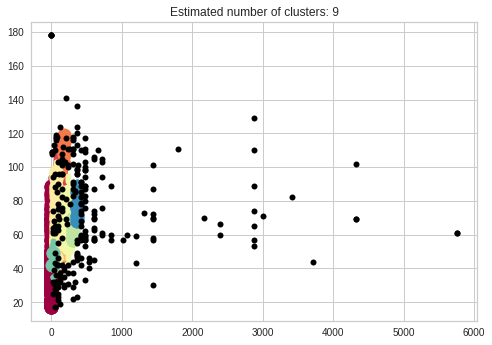

Category 'cultura' has 10 clusters and 305 noisy points
Distribution of the samples in the clusters: {-1: 305, 1: 184, 2: 128, 3: 53, 0: 32, 6: 21, 5: 17, 8: 14, 7: 13, 9: 13, 4: 12}



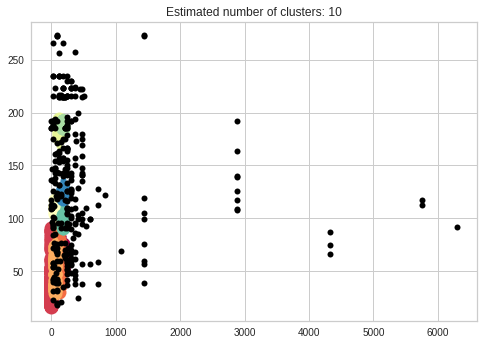

Category 'food' has 8 clusters and 234 noisy points
Distribution of the samples in the clusters: {0: 417, 1: 293, -1: 234, 4: 140, 2: 34, 3: 25, 7: 20, 5: 17, 6: 11}



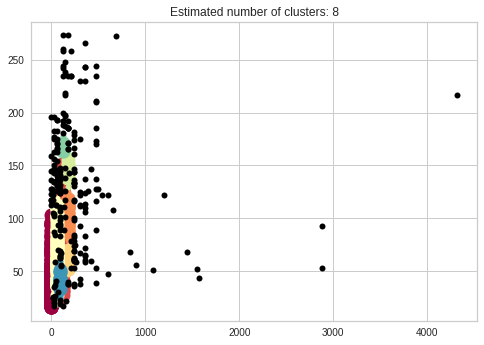

Category 'sport' has 6 clusters and 214 noisy points
Distribution of the samples in the clusters: {-1: 214, 1: 35, 5: 20, 2: 16, 0: 14, 4: 14, 3: 13}



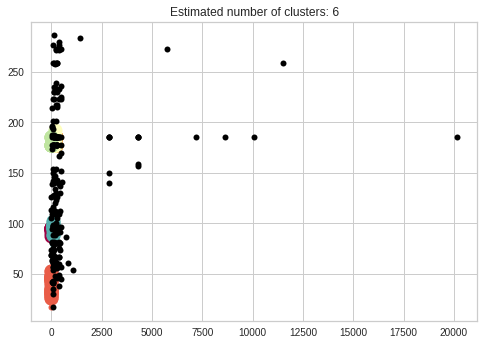

Category 'tempo libero' has 13 clusters and 297 noisy points
Distribution of the samples in the clusters: {-1: 297, 1: 32, 6: 25, 4: 24, 9: 21, 7: 21, 2: 18, 0: 15, 3: 13, 8: 13, 10: 13, 12: 10, 5: 10, 11: 10}



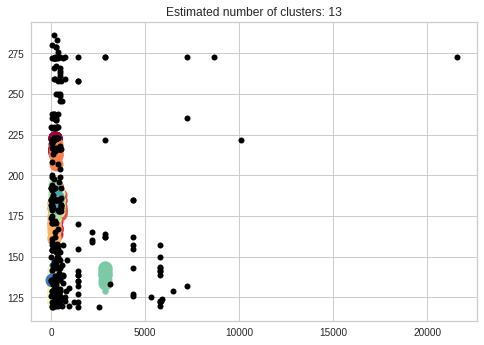

Category 'viaggi' has 12 clusters and 280 noisy points
Distribution of the samples in the clusters: {0: 382, -1: 280, 5: 50, 3: 47, 4: 35, 1: 32, 2: 28, 7: 21, 8: 20, 10: 13, 11: 12, 9: 10, 6: 4}



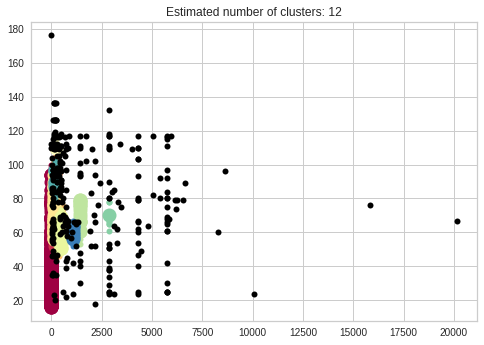

In [ ]:
dbscan_tfidf = DBSCAN_categories(X, categories, tfidf_dict, plot=True)

Category 'aria aperta' has 0 clusters and 738 noisy points
Distribution of the samples in the clusters: {-1: 738}



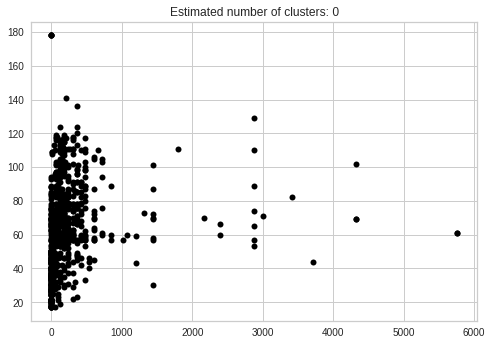

Category 'cultura' has 0 clusters and 792 noisy points
Distribution of the samples in the clusters: {-1: 792}



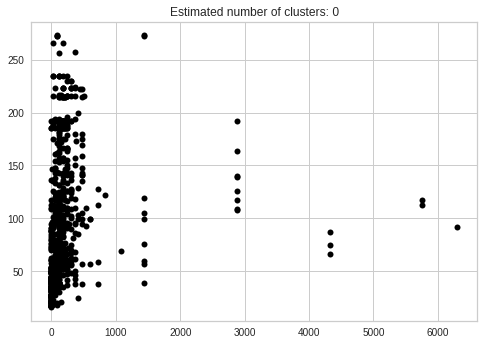

Category 'food' has 0 clusters and 1191 noisy points
Distribution of the samples in the clusters: {-1: 1191}



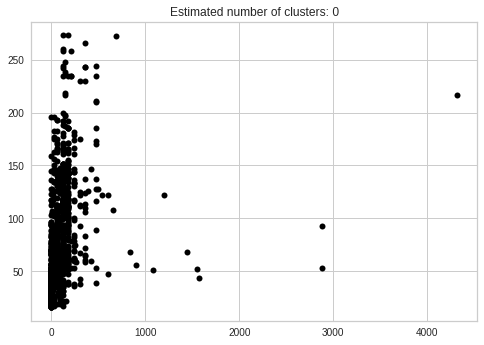

Category 'sport' has 0 clusters and 326 noisy points
Distribution of the samples in the clusters: {-1: 326}



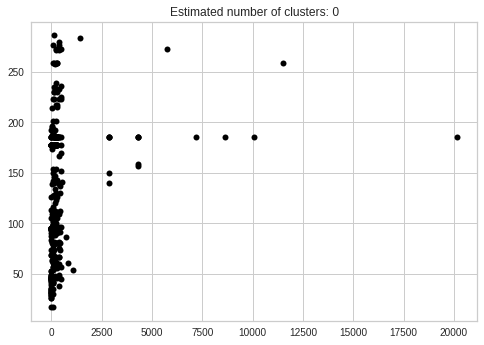

Category 'tempo libero' has 0 clusters and 522 noisy points
Distribution of the samples in the clusters: {-1: 522}



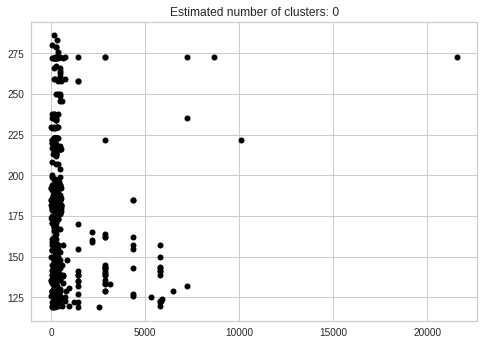

Category 'viaggi' has 0 clusters and 934 noisy points
Distribution of the samples in the clusters: {-1: 934}



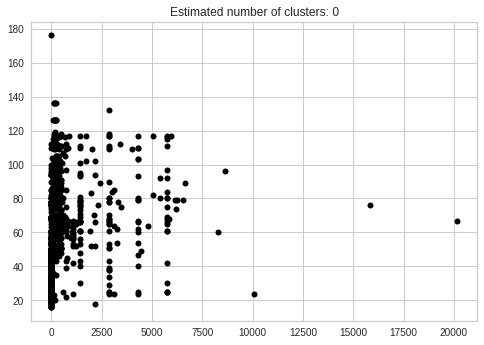

In [ ]:
dbscan_embeddings = DBSCAN_categories(X, categories, embeddings, plot=True)

### GMM

In [ ]:
def plot_GMM(gmm, data:pd.DataFrame):
  data_array = data.to_numpy()
  gmm_labels = gmm.predict(data_array)
  plt.scatter(data_array[:,0], data_array[:,1], c=gmm_labels, cmap='rainbow')
  plt.axis('equal')
  plt.show()

In [ ]:
from sklearn.mixture import GaussianMixture

def GMM_categories(data:pd.DataFrame, categories:list, description_dict:dict, plot:bool=False):
  gmm_dict = dict()
  for c in categories:
    data_category = data[data[c]!=0]
    descriptions_encodings = pd.DataFrame(description_dict[c], index=data_category.index)
    data_category.drop(columns=categories, inplace=True)
    data_with_encodings = pd.concat([data_category, descriptions_encodings], axis=1, ignore_index=True)
    gmm = GaussianMixture(n_components=5, random_state=42).fit(data_with_encodings)
    gmm_dict[c] = gmm
    print("Plot of clusters for class {}".format(c))
    #plot_gmm(gmm, data_with_tfidf)
    plot_GMM(gmm, data_with_encodings)
    #plot_results(data_with_tfidf, gmm.predict(data_with_tfidf), gmm.means_, gmm.covariances_, 0, "Class {}".format(c))
  return gmm_dict

Plot of clusters for class aria aperta


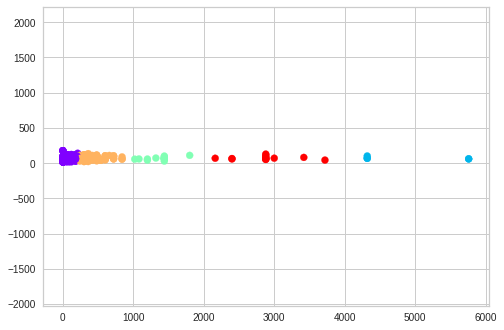

Plot of clusters for class cultura


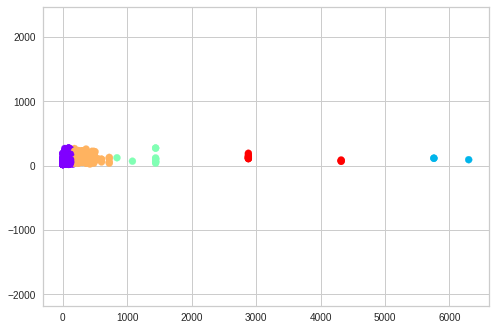

Plot of clusters for class food


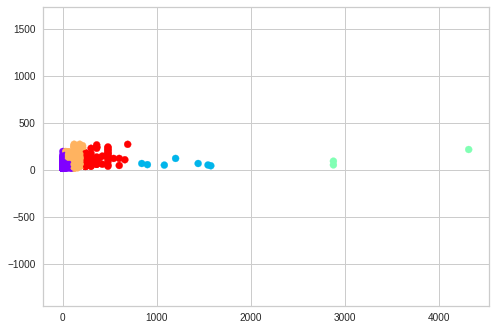

Plot of clusters for class sport


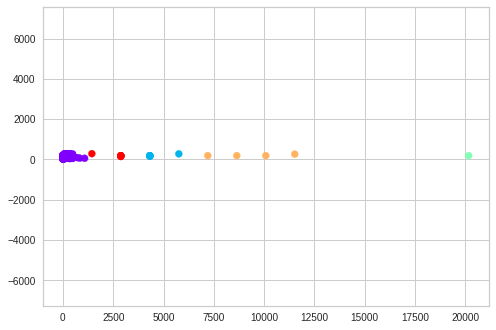

Plot of clusters for class tempo libero


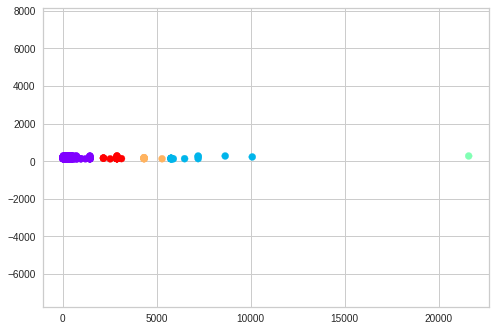

Plot of clusters for class viaggi


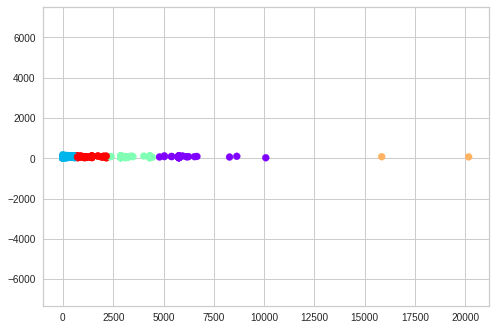

{'aria aperta': GaussianMixture(n_components=5, random_state=42),
 'cultura': GaussianMixture(n_components=5, random_state=42),
 'food': GaussianMixture(n_components=5, random_state=42),
 'sport': GaussianMixture(n_components=5, random_state=42),
 'tempo libero': GaussianMixture(n_components=5, random_state=42),
 'viaggi': GaussianMixture(n_components=5, random_state=42)}

In [ ]:
GMM_categories(X, categories, tfidf_dict, plot=True)

Plot of clusters for class aria aperta


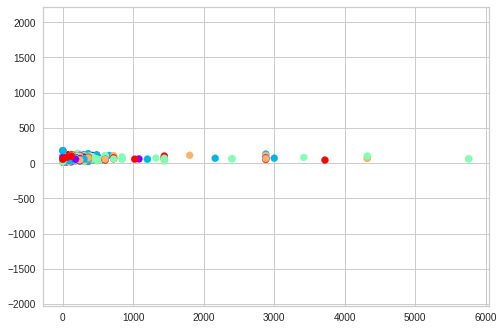

Plot of clusters for class cultura


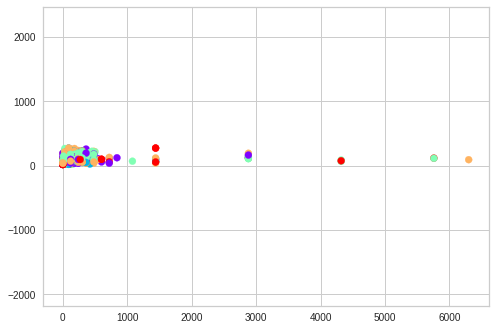

Plot of clusters for class food


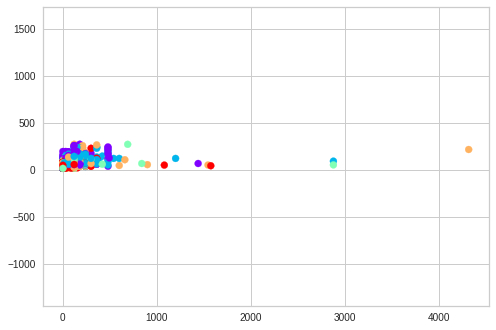

Plot of clusters for class sport


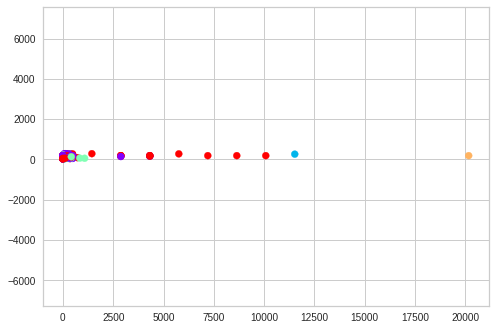

Plot of clusters for class tempo libero


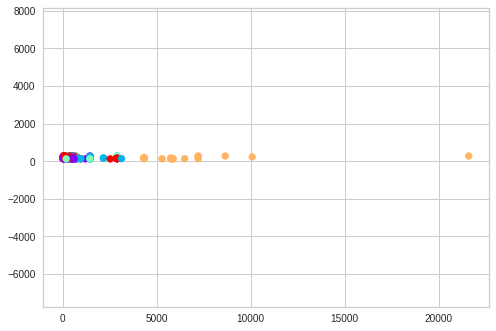

Plot of clusters for class viaggi


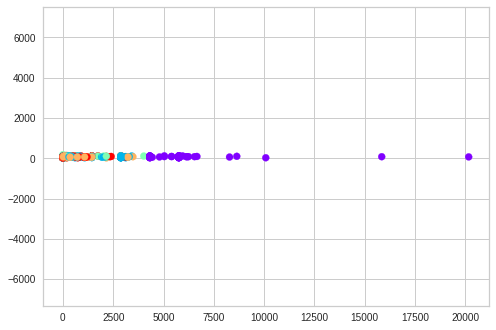

{'aria aperta': GaussianMixture(n_components=5, random_state=42),
 'cultura': GaussianMixture(n_components=5, random_state=42),
 'food': GaussianMixture(n_components=5, random_state=42),
 'sport': GaussianMixture(n_components=5, random_state=42),
 'tempo libero': GaussianMixture(n_components=5, random_state=42),
 'viaggi': GaussianMixture(n_components=5, random_state=42)}

In [ ]:
GMM_categories(X, categories, embeddings, plot=True)

### UMAP + HDBSCAN

In [ ]:
!pip install hdbscan
!pip install umap-learn

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5.2 MB 4.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2330787 sha256=010db4b98d2b557b23e88da6dd9538284c3f303b10bdcfb3df61c01cec92f61e
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
Successfully built hdbscan
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 88 kB 3.4 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.1 MB 24.3 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=0ba5e1975819b8965bc27a047c1e35909cef1d06ccba3625ccbb7f658975cbee
  Stored in directory: /root/.cache/pip/wheels/b3/52/

In [ ]:
import hdbscan
import umap.umap_ as umap

In [ ]:
def plot_clusters(embeddings, clusters, n_neighbors:int=15, min_dist:float=0.1):
    """
    Reduce dimensionality of best clusters and plot in 2D

    Arguments:
        embeddings: embeddings to use
        clusteres: HDBSCAN object of clusters
        n_neighbors: float, UMAP hyperparameter n_neighbors
        min_dist: float, UMAP hyperparameter min_dist for effective
                  minimum distance between embedded points

    """
    umap_data = umap.UMAP(n_neighbors=n_neighbors, 
                          n_components=2, 
                          min_dist = min_dist,  
                          #metric='cosine',
                          random_state=42).fit_transform(embeddings)

    point_size = 100.0 / np.sqrt(embeddings.shape[0])
    
    result = pd.DataFrame(umap_data, columns=['x', 'y'])
    result['labels'] = clusters.labels_

    fig, ax = plt.subplots(figsize=(14, 8))
    outliers = result[result.labels == -1]
    clustered = result[result.labels != -1]
    plt.scatter(outliers.x, outliers.y, color = 'lightgrey', s=point_size)
    plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=point_size, cmap='jet')
    plt.colorbar()
    plt.show()

In [ ]:
def score_clusters(clusters, prob_threshold:float = 0.05):
    """
    Returns the label count and cost of a given clustering

    Arguments:
        clusters: HDBSCAN clustering object
        prob_threshold: float, probability threshold to use for deciding
                        what cluster labels are considered low confidence

    Returns:
        label_count: int, number of unique cluster labels, including noise
        cost: float, fraction of data points whose cluster assignment has
              a probability below cutoff threshold
    """
    
    cluster_labels = clusters.labels_
    label_count = len(np.unique(cluster_labels))
    total_num = len(clusters.labels_)
    cost = (np.count_nonzero(clusters.probabilities_ < prob_threshold)/total_num)
    
    return label_count, cost

In [ ]:
def generate_clusters(message_embeddings,
                      n_neighbors:int,
                      n_components:int, 
                      min_cluster_size:int,
                      min_dist:float,
                      min_samples:int = None,
                      random_state:int = None):
    """
    Returns HDBSCAN objects after first performing dimensionality reduction using UMAP
    
    Arguments:
        message_embeddings: embeddings to use
        n_neighbors: int, UMAP hyperparameter n_neighbors
        n_components: int, UMAP hyperparameter n_components
        min_cluster_size: int, HDBSCAN hyperparameter min_cluster_size
        min_samples: int, HDBSCAN hyperparameter min_samples
        random_state: int, random seed
        
    Returns:
        clusters: HDBSCAN object of clusters
    """
    
    umap_embeddings = (umap.UMAP(n_neighbors = n_neighbors, 
                                n_components = n_components, 
                                #metric = 'cosine', 
                                min_dist = min_dist,
                                random_state=random_state)
                            .fit_transform(message_embeddings))

    clusters = hdbscan.HDBSCAN(min_cluster_size = min_cluster_size, 
                               min_samples = min_samples,
                               #metric='euclidean', 
                               gen_min_span_tree=True,
                               cluster_selection_method='eom').fit(umap_embeddings)
    return clusters

In [ ]:
def compute_hdbscan_dict(embeddings:dict, 
                         categories:list, 
                         n_neighbors:int = 100, 
                         n_components:int = 2, 
                         min_cluster_size:int = 100,
                         min_dist:float = 0.5): 

  hdbscan_clusters = dict()
  for c in categories:
    print("Clustering category '{}'".format(c))
    try:
      if type(embeddings[c]) == list:
        embeddings_cpu = torch.Tensor(len(embeddings[c]), len(embeddings[c][0]))
        list_emb = [t.unsqueeze(0) for t in embeddings[c]] 
        #print(embeddings_cpu.shape, list_emb[0].shape)
        embeddings_cpu = torch.cat(list_emb, dim=0)
        encodings = embeddings_cpu.cpu()
        #print(embeddings_cpu.device)
      else:
        encodings = embeddings[c]
      hdbscan_clusters[c] = generate_clusters(encodings,
                                              n_neighbors = n_neighbors, 
                                              n_components = n_components, 
                                              min_cluster_size = min_cluster_size,
                                              min_dist = min_dist,
                                              random_state=42)
      labels_def, cost_def = score_clusters(hdbscan_clusters[c])
      print("Number of labels: {}".format(labels_def))
      print("Cost: {}".format(cost_def))
      plot_clusters(encodings,
                    hdbscan_clusters[c],
                    n_neighbors = n_neighbors,
                    min_dist = min_dist)
    except Exception as e:
      print("---> Cannot cluster category '{}' because of error:\n{}".format(c, e))
      #continue
    print()
  return hdbscan_clusters

Clustering category 'aria aperta'
Number of labels: 2
Cost: 0.0


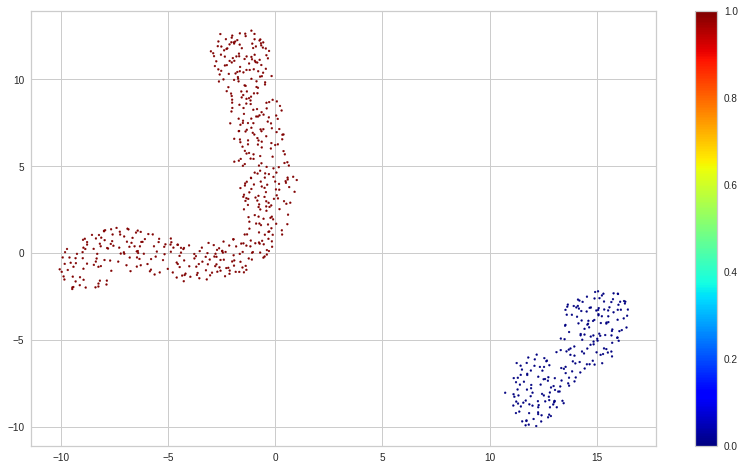


Clustering category 'cultura'
Number of labels: 2
Cost: 0.0


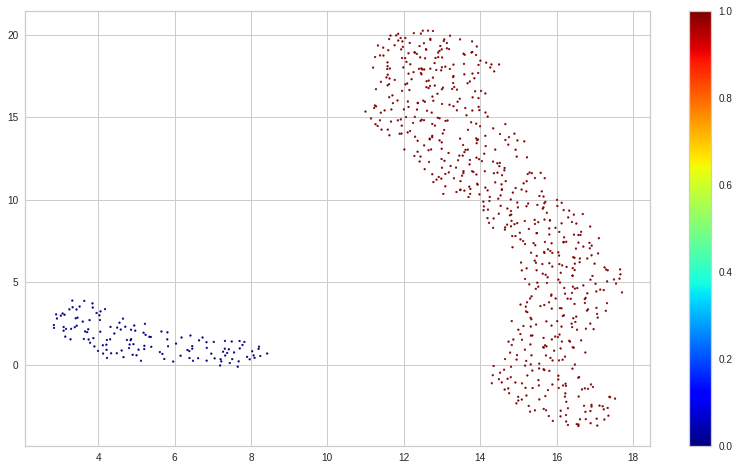


Clustering category 'food'
Number of labels: 2
Cost: 0.0


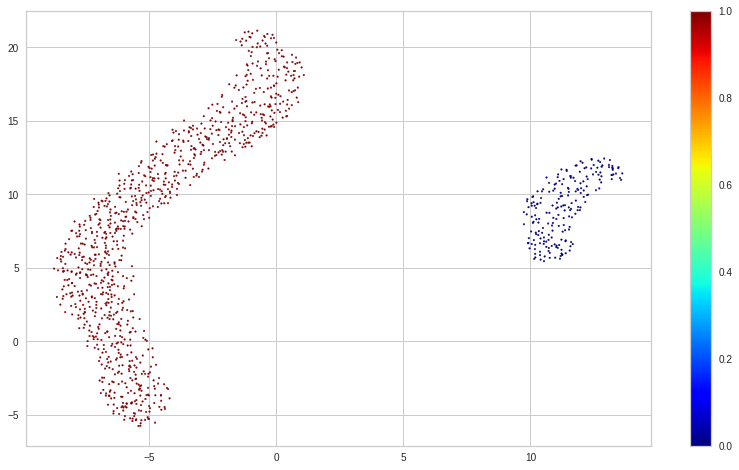


Clustering category 'sport'
Number of labels: 2
Cost: 0.0


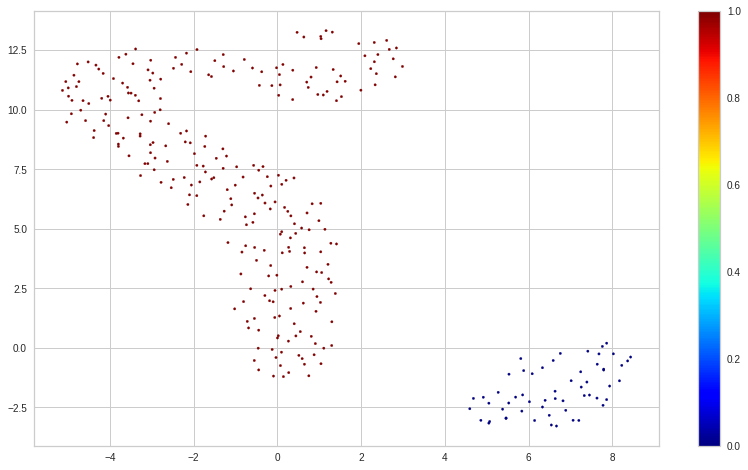


Clustering category 'tempo libero'
Number of labels: 2
Cost: 0.0


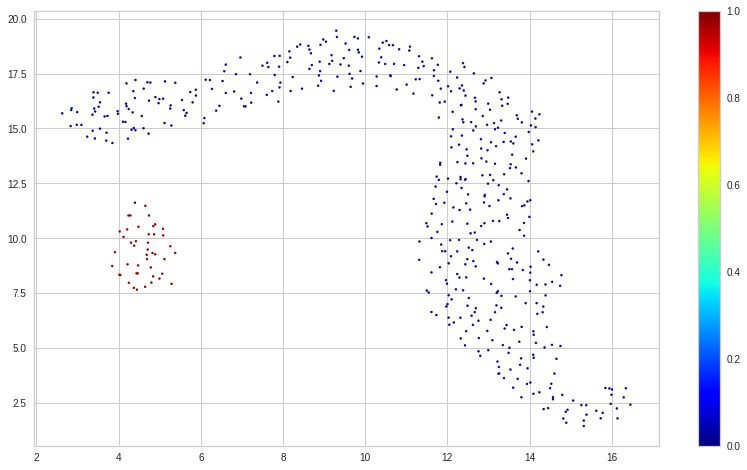


Clustering category 'viaggi'
Number of labels: 2
Cost: 0.0


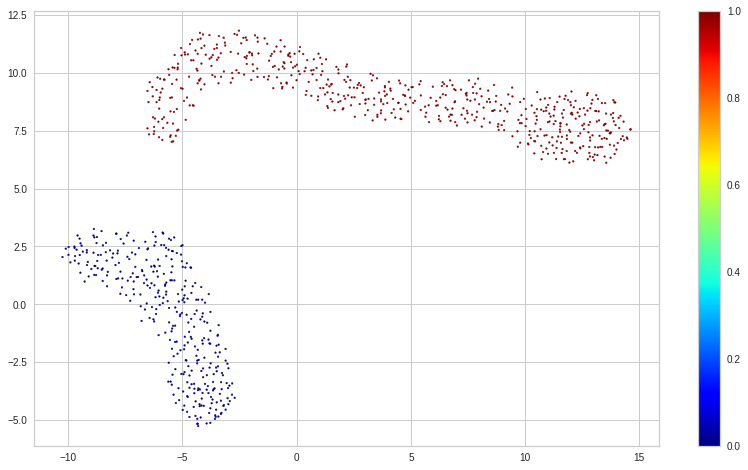

In [ ]:
hdbscan_dict = compute_hdbscan_dict(embeddings, 
                                    categories,
                                    n_neighbors = 200, 
                                    n_components = 2, 
                                    min_cluster_size = 30,
                                    min_dist=0.9)

Clustering category 'aria aperta'
Number of labels: 3
Cost: 0.2506775067750677


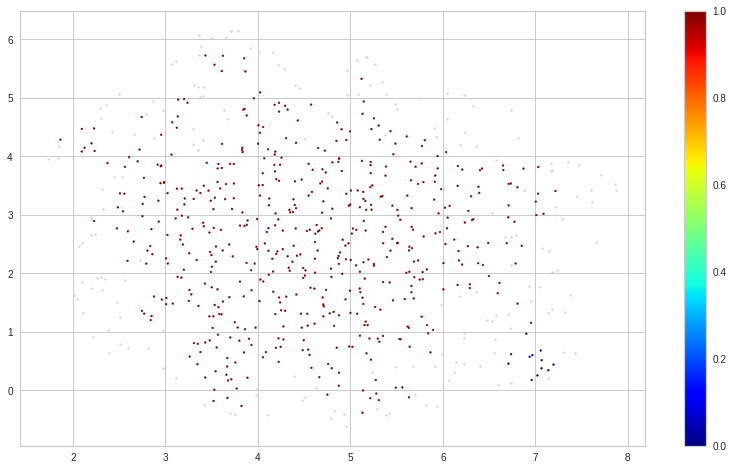


Clustering category 'cultura'
Number of labels: 3
Cost: 0.06060606060606061


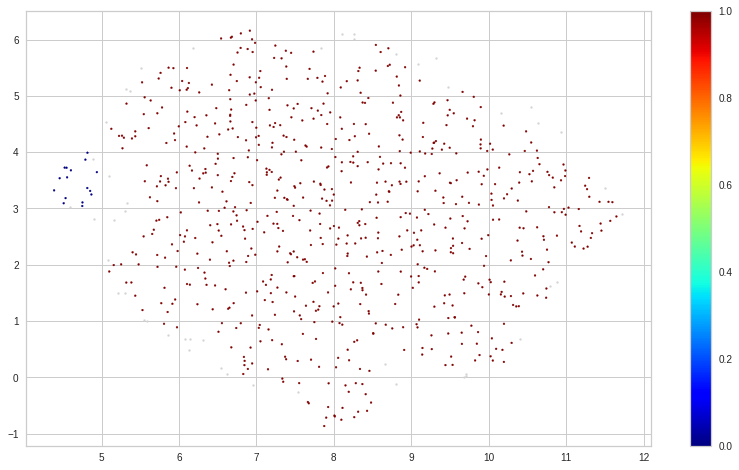


Clustering category 'food'
Number of labels: 2
Cost: 0.0


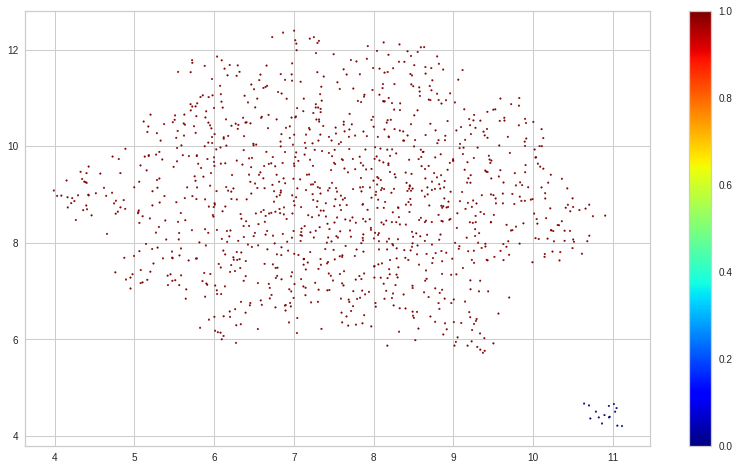


Clustering category 'sport'
Number of labels: 4
Cost: 0.8190184049079755


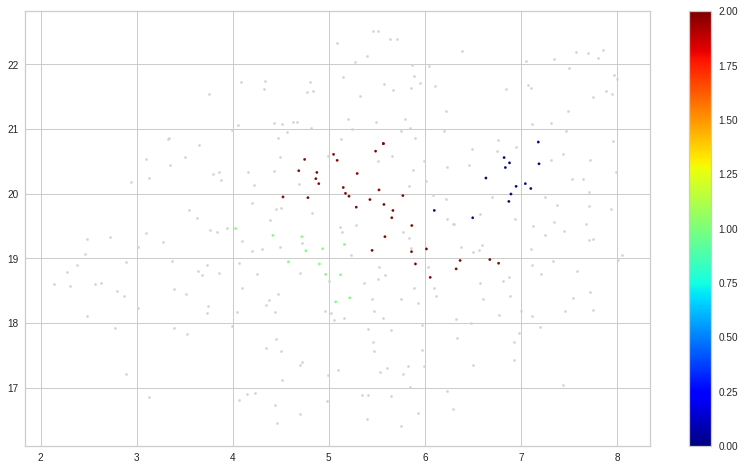


Clustering category 'tempo libero'
Number of labels: 3
Cost: 0.10727969348659004


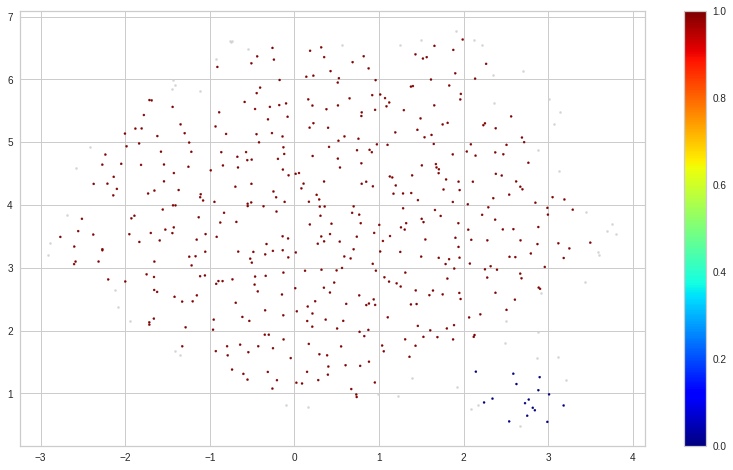


Clustering category 'viaggi'
Number of labels: 3
Cost: 0.14882226980728053


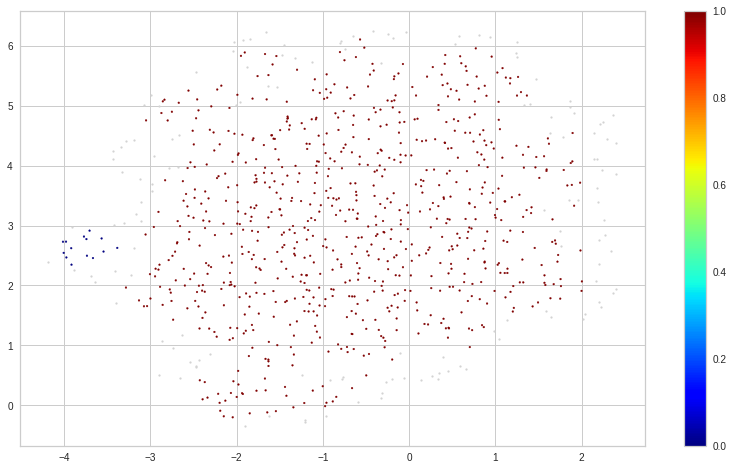

In [ ]:
hdbscan_dict = compute_hdbscan_dict(tfidf_dict,
                                    categories,
                                    n_neighbors = 100, 
                                    n_components = 2, 
                                    min_cluster_size = 10,
                                    min_dist=0.5)

### WEClustering

The algorithm is described in my notes (/Clustering/WECustering)

#### Phases 1-2: Preprocess, embeddings extraction and filtration

In [20]:
!pip install emoji

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 175 kB 9.6 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=bf69b5961f6ddd20a934f4bbbe8ddfadf22d8d274498fdfa40733f2461557a50
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [21]:
from math import ceil
from tqdm import tqdm

import nltk
nltk.download('punkt')

from nltk.corpus import stopwords
nltk.download('stopwords')
ita_stopwords = set(nltk.corpus.stopwords.words('italian'))

import emoji
import string
punctuation = string.punctuation.replace("#","")
punctuation += '‚Äô'

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [22]:
device = 0
if torch.cuda.is_available():    
    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [27]:
class MyTransformer():
    def __init__(
            self,
            pretrained_model_name_or_path: str = "dbmdz/bert-base-italian-cased",
            device: str = 'cpu'
    ):
        super().__init__()
        self.tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path)
        self.model = AutoModel.from_pretrained(pretrained_model_name_or_path)
        self.model.to(device)
        print("Device used: {}".format(self.model.device))
        self.word_dictionary = dict()
        self.set_w = set()

    def add_special_tokens(self, tokens_ids):
      # add CLS (token_id is 101) and SEP (token_id is 102)
      ids = [101] + tokens_ids + [102]
      # add padding (token_id is 0)
      padding_length = 512-len(ids)
      for i in range(padding_length):
        ids += [0]
      #print("\n padding_length: {} - len(tokens_ids): {}\nTokens_ids: {}".format(padding_length, len(ids), ids))
      return ids

    def compute_embedding(self, tokens_ids):
      self.model.eval()
      with torch.no_grad():
        if(len(tokens_ids) <= 510):
          #tokens_ids = self.add_special_tokens(tokens_ids)
          context_embeddings = self.model(torch.tensor(tokens_ids)[None,:].to(device))[0]
        else:
          k = ceil(len(tokens_ids) / 510.0)
          chunks = np.array_split(tokens_ids, k)
          for i in range(len(chunks)):
            chunks[i] = self.add_special_tokens(chunks[i].tolist())
          chunks_tensor = torch.tensor(chunks[0])[None,:].to(device)
          context_embeddings_list = self.model(chunks_tensor)[0].to(device)
          for i in range(1, len(chunks)):
            chunks_tensor = torch.tensor(chunks[i])[None,:].to(device)
            context_embeddings_list = torch.cat((context_embeddings_list, self.model(chunks_tensor)[0]), 1)
          #dim = context_embeddings_list.shape[-1]
          context_embeddings = context_embeddings_list.to(device)
        #compute the average of the vectors
        #avg_embeddings = torch.sum(context_embeddings,1)[0]
        #print("Embeddings shape: {}".format(context_embeddings.shape))
      return context_embeddings

    def demoji(self, text):
      allchars = [str for str in text] #.decode('utf-8')
      emoji_list = [c for c in allchars if c in emoji.UNICODE_EMOJI]
      clean_text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)])
      return clean_text


# I can obtain the embedding of a word by averaging the subwords -> 
# once I have the sentence's embeddings I can transform subwords back to words 
# ## means that the subword has to be attached to the previous one without spaces

    def words_from_subwords(self, emb, tokens:list):
      list_emb = emb.tolist()
      res_tokens = []
      res_emb = []
      for j, t in enumerate(tokens):
        if t[:2] == "##":
          #print(tokens[j-1], tokens[j])
          word = res_tokens[-1] + tokens[j].replace("#", "")
          res_tokens[-1] = word
          emb_mean = [np.mean(k) for k in zip(res_emb[-1], list_emb[0][j])]
          res_emb[-1] = emb_mean
        else:
          res_tokens.append(t)
          res_emb.append(list_emb[0][j])
      return torch.unsqueeze(torch.Tensor(res_emb), 0), res_tokens

    def filter_embeddings(self, emb, tokens:list):
      list_emb = emb.tolist()
      res_tokens = []
      #print(len(list_emb[0]))
      del_count = 0
      for j, t in enumerate(tokens):
        #remove [UNK]
        if t == "[UNK]":
          list_emb[0].pop(j-del_count)
          del_count += 1
        #remove digits
        elif any(ch.isdigit() for ch in t):
          list_emb[0].pop(j-del_count)
          del_count += 1
        #remove punctuation
        elif any(ch in punctuation for ch in t):
          list_emb[0].pop(j-del_count)
          del_count += 1
        #remove stopwords
        elif t.lower() in ita_stopwords: #.replace("#", "")
          list_emb[0].pop(j-del_count)
          del_count += 1
        else:
          res_tokens.append(t)
      return torch.Tensor(list_emb), res_tokens

    def compute_word_dictionary(self, tokens:list, embeddings:list, doc:int):
      for t,e in zip(tokens, embeddings[0]):
        #print("TOKEN: " + t)
        #print("emb shape: {}".format(e.shape))
        if t in self.word_dictionary:
          # add doc -> if a token appears more than once in a document than it will be added multiple times
          self.word_dictionary[t][1].append(doc)
          #print("DICT: {}".format(self.word_dictionary[t]))
          # compute new value for the embeddings of the token
          numb_doc = len(self.word_dictionary[t][1])
          #old_emb = torch.mul(self.word_dictionary[t][0], numb_doc-1) 
          old_emb = self.word_dictionary[t][0]
          assert not True in torch.isinf(old_emb), "Bug in torch.mul: {}".format(torch.isinf(old_emb))
          list_old_emb = [old_emb for i in range(numb_doc-1)]
          #print(len(list_old_emb), numb_doc)
          list_old_emb.append(e)
          new_emb = torch.stack(list_old_emb, dim=0)
          assert not True in torch.isinf(new_emb), "Bug in new_emb: {}".format(new_emb)
          #print("SHAPE: {}".format(new_emb.shape))
          mean = torch.mean(new_emb, dim=0)
          assert not True in torch.isinf(mean), "Bug in torch.mean: {} {} {} {} {}".format(numb_doc, e, self.word_dictionary[t][0], new_emb, mean)
          self.word_dictionary[t][0] = mean
          #print(self.word_dictionary[t][0].shape, self.word_dictionary[t][1])
        else:
          #print("new word")
          self.word_dictionary[t] = [e,[doc]]
          #print(self.word_dictionary[t][0].shape, self.word_dictionary[t][1])

    # check if number of distinct tokens is equal to number of tokens in the dictionary
    def nested_sum(self, L):
        total = 0 
        for i in L:
            if isinstance(i, list):  # checks if `i` is a list
                self.nested_sum(i)
            else:
                self.set_w.add(i)
        return

    def check_number_words(self, tokens):
      self.nested_sum(tokens)
      assert len(self.set_w) == len(self.word_dictionary), "number of tokens in the dictionary is wrong"

    def encode(self, docs):
      embedded_docs = []
      tokens_docs = []
      for id,d in tqdm(enumerate(docs)):
        embedded_sentence = []
        tokens_sentence = []
        sentences =  nltk.tokenize.sent_tokenize(d)
        #print("-"*100)
        #print("ID: {}".format(id))
        for s in sentences:
          #s = self.demoji(s)
          if not s: #df_schede has null descriptions
            print("Empty description")
            empty_embedding = torch.zeros(768).to(device)
            embedded_sentence.append(empty_embedding)
            tokens_sentence.append([])
            continue
          t = self.tokenizer.tokenize(s)
          tokens_ids = self.tokenizer.convert_tokens_to_ids(t)
          #print("Tokens: {}".format(t))
          #print("Number of tokens ids: {}".format(len(tokens_ids)))
          embedding = self.compute_embedding(tokens_ids)
          #print("DIM after compute_embedding: {} {}".format(embedding.shape, len(tokens_ids)))
          #print(t)
          words_emb, words_tokens = self.words_from_subwords(embedding, t)
          #print("DIM after merging of the subwords: {} {}".format(words_emb.shape, len(words_tokens)))
          filtered_emb, filtered_tokens = self.filter_embeddings(words_emb, words_tokens)
          #print("DIM after filter: {} {}".format(filtered_emb.shape, len(filtered_tokens)))
          self.compute_word_dictionary(filtered_tokens, filtered_emb, id)
          embedded_sentence.append(filtered_emb)
          tokens_sentence.append(filtered_tokens)
          #print("After filter: {}".format(filtered_emb.shape))
        embedded_docs.append(embedded_sentence)
        tokens_docs.append(tokens_sentence)
      self.check_number_words(tokens_docs)
      return embedded_docs, tokens_docs

In [28]:
model = MyTransformer(device=device)
#embeddings, tokens = model.encode(df_schede.description)
embeddings, tokens = model.encode(df_schede.description.iloc[:100])

Some weights of the model checkpoint at dbmdz/bert-base-italian-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Device used: cuda:0


100it [01:11,  1.39it/s]


In [29]:
#a = torch.Tensor(embeddings)
count = 0
for e in model.word_dictionary.values():
  if True in torch.isinf(e[0]):
    count += 1
    #print(e[0])
    print("Infinite")
print(count)

0


#### Save results in files

In [ ]:
embeddings_path = "/content/drive/MyDrive/Tesi/WEClustering.pt"
tokens_path = "/content/drive/MyDrive/Tesi/WEClustering_tokens.csv"
word_dictionary_path = "/content/drive/MyDrive/Tesi/words.pkl"

In [ ]:
# import pickle
# w_file = open(word_dictionary_path, "wb")
# pickle.dump(model.word_dictionary, w_file)
# w_file.close()

# w_file = open(word_dictionary_path, "rb")
# output = pickle.load(w_file)
# print(output)

In [ ]:
# import csv
# # save embeddings
# torch.save(embeddings, embeddings_path)
# # save tokens
# with open(tokens_path, "w") as f:
#     wr = csv.writer(f)
#     wr.writerows(tokens)

In [ ]:
# import csv
# # load embeddings
# embeddings = torch.load(embeddings_path)
# # load tokens
# with open(tokens_path, 'r') as read_obj:
#     csv_reader = csv.reader(read_obj)
#     tokens = list(csv_reader)
#     #print(tokens)

#### TF-IDF

In [30]:
import ast
# from list of lists to list of documents
docs = []
for d in tokens:
  doc = []
  for s in d:
    if type(s)==str:
      doc += ast.literal_eval(s)
    else:
      doc += s
  text = " ".join(doc)
  docs.append(text)

In [31]:
tfidf_vectorizer = TfidfVectorizer(lowercase=False)

#text = data.description
tfidf_schede = tfidf_vectorizer.fit_transform(docs)
dense_text = tfidf_schede.todense()
denselist_text = dense_text.tolist()

dataset_text_tfidf = pd.DataFrame(denselist_text, index=df_schede.description.iloc[:len(tokens)].index,
                                  columns=tfidf_vectorizer.get_feature_names())
dataset_text_tfidf

AJC  ATM  Above  Abul  Acquistare  Adhai  Affacciandosi  Afghanistan  \
0   0.0  0.0    0.0   0.0         0.0    0.0            0.0          0.0   
1   0.0  0.0    0.0   0.0         0.0    0.0            0.0          0.0   
2   0.0  0.0    0.0   0.0         0.0    0.0            0.0          0.0   
3   0.0  0.0    0.0   0.0         0.0    0.0            0.0          0.0   
4   0.0  0.0    0.0   0.0         0.0    0.0            0.0          0.0   
..  ...  ...    ...   ...         ...    ...            ...          ...   
95  0.0  0.0    0.0   0.0         0.0    0.0            0.0          0.0   
96  0.0  0.0    0.0   0.0         0.0    0.0            0.0          0.0   
97  0.0  0.0    0.0   0.0         0.0    0.0            0.0          0.0   
98  0.0  0.0    0.0   0.0         0.0    0.0            0.0          0.0   
99  0.0  0.0    0.0   0.0         0.0    0.0            0.0          0.0   

    Africa  Aggirandosi  ...  zampe  zangolando  zenzero   zipline      zona  \
0      0.0          0.0  ...    0.0         0.0      0.0  0.000000  0.000000   
1      0.0          0.0  ...    0.0         0.0      0.0  0.000000  0.000000   
2      0.0          0.0  ...    0.0         0.0      0.0  0.000000  0.036285   
3      0.0          0.0  ...    0.0         0.0      0.0  0.000000  0.000000   
4      0.0          0.0  ...    0.0         0.0      0.0  0.000000  0.077819   
..     ...          ...  ...    ...         ...      ...       ...       ...   
95     0.0          0.0  ...    0.0         0.0      0.0  0.000000  0.000000   
96     0.0          0.0  ...    0.0         0.0      0.0  0.000000  0.000000   
97     0.0          0.0  ...    0.0         0.0      0.0  0.000000  0.000000   
98     0.0          0.0  ...    0.0         0.0      0.0  0.120413  0.000000   
99     0.0          0.0  ...    0.0         0.0      0.0  0.000000  0.000000   

        zone  zoo  zucca  zuccherato  zucchero  
0   0.048885  0.0    0.0         0.0       0.0  
1   0.000000  0.0    0.0         0.0       0.0  
2   0.000000  0.0    0.0         0.0       0.0  
3   0.000000  0.0    0.0         0.0       0.0  
4   0.000000  0.0    0.0         0.0       0.0  
..       ...  ...    ...         ...       ...  
95  0.041149  0.0    0.0         0.0       0.0  
96  0.000000  0.0    0.0         0.0       0.0  
97  0.043196  0.0    0.0         0.0       0.0  
98  0.000000  0.0    0.0         0.0       0.0  
99  0.000000  0.0    0.0         0.0       0.0  

[100 rows x 7178 columns]

In [32]:
np.count_nonzero(dataset_text_tfidf)

16353

#### Phase 3: Clustering of word embeddings

Build a matrix of dimension (n_words*768) and use K-means on it. How to build this matrix (not specified in the paper)?

1.   Take average of a certain token occurrences;
2.   Consider all the embeddings as separated words

I am using the first approach

In [33]:
embs_list = list()
words_array = list()
for k,v in model.word_dictionary.items():
  words_array.append(k)
  embs_list.append(v[0].cpu().detach().numpy())

embs_array = np.array(embs_list)

In [34]:
embs_array.shape

(7195, 768)

In [39]:
from sklearn.cluster import MiniBatchKMeans
def compute_mini_kmeans(data_array):
  mini_kmeans = KMeans()
  #mini_kmeans = MiniBatchKMeans(random_state=0)#,batch_size=64)
  visualizer = KElbowVisualizer(mini_kmeans, k=range(4,30,2), timings=False)

  visualizer.fit(data_array)        
  visualizer.show() 
  elbow = visualizer.elbow_value_
  #cluster with optimal number of clusters
  clustering = KMeans(n_clusters=elbow, random_state=0).fit(embs_array)
  labels = clustering.labels_

  return labels, elbow

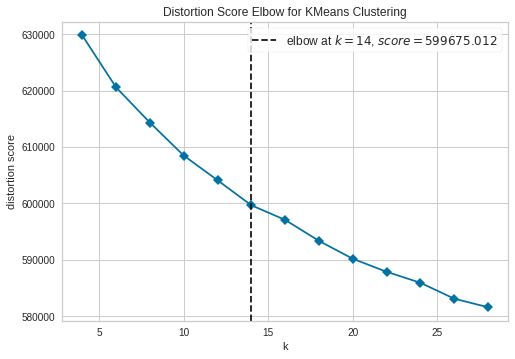

In [40]:
labels, elbow = compute_mini_kmeans(embs_array)

In [41]:
np.unique(labels, return_counts=True) 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
       dtype=int32),
 array([606, 211, 566, 647, 404, 269, 544, 504, 389, 671, 510, 556, 573,
        745]))

#### Phase 4: Generation of concept-document matrix CD


In [42]:
labels

array([11, 10,  7, ...,  4,  4, 10], dtype=int32)

In [43]:
print(len(dataset_text_tfidf.columns), len(words_array), len(labels))

7178 7195 7195


In [44]:
CD_list = [[] for i in range(len(tokens))]
for c in range(elbow):
  #retrieve tokens in concept
  tokens_index = np.where(labels == c)
  tokens_in_c = []
  for idx in tokens_index[0]:
    tokens_in_c.append(words_array[idx])
  for d in range(len(tokens)):
    #retrieve TF-IDF for the words
    val = 0
    for t in tokens_in_c:
      try:
        val += dataset_text_tfidf[t].iloc[d]
      except:
        continue
    CD_list[d].append(val)

In [45]:
CD_matrix = np.array(CD_list)

In [46]:
CD_matrix.shape

(100, 14)

#### Phase 5: Clustering of the CD matrix

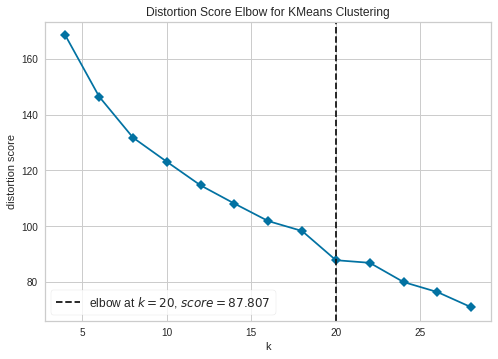

In [47]:
final_labels, final_elbow = compute_mini_kmeans(CD_matrix)

### LDA

In [ ]:
!pip install pyLDAvis

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.7 MB 3.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=bde71bdbf5e050b84d31addfa8691e7b07f40e73685b848c3f40d69aa0cc6744
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [ ]:
import gensim
from gensim.test.utils import common_corpus, common_dictionary
import os
import ast

In [ ]:
texts = list(data.description)
for i,t in enumerate(texts):
  texts[i]= ast.literal_eval(t)
id2word = gensim.corpora.Dictionary(texts)
corpus = [id2word.doc2bow(t) for t in texts]

In [ ]:
# number of topics
num_topics = 30
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the topics
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

In [ ]:
import pyLDAvis.gensim_models
import pyLDAvis
# Visualize the topics
#pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds='mmds')
pyLDAvis.display(LDAvis_prepared)

### Top2Vec

In [ ]:
!pip install top2vec

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 24.1 MB 1.2 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
from top2vec import Top2Vec

In [ ]:
model = Top2Vec(documents=list(df_schede.description), speed="learn")

2022-05-10 08:30:26,627 - top2vec - INFO - Pre-processing documents for training
2022-05-10 08:30:32,848 - top2vec - INFO - Creating joint document/word embedding
2022-05-10 08:32:41,462 - top2vec - INFO - Creating lower dimension embedding of documents
2022-05-10 08:32:54,170 - top2vec - INFO - Finding dense areas of documents
2022-05-10 08:32:54,286 - top2vec - INFO - Finding topics


In [ ]:
model.get_num_topics()

36

get_topic_sizes returns:

- topic_sizes: The number of documents most similar to each topic.

- topic_nums: The unique index of every topic will be returned.

In [ ]:
topic_sizes, topic_nums = model.get_topic_sizes()
for ts,tn in zip(topic_sizes, topic_nums):
  print("Topic {} has {} documents".format(tn,ts))

Topic 0 has 412 documents
Topic 1 has 354 documents
Topic 2 has 276 documents
Topic 3 has 256 documents
Topic 4 has 232 documents
Topic 5 has 207 documents
Topic 6 has 193 documents
Topic 7 has 188 documents
Topic 8 has 179 documents
Topic 9 has 142 documents
Topic 10 has 141 documents
Topic 11 has 139 documents
Topic 12 has 120 documents
Topic 13 has 117 documents
Topic 14 has 116 documents
Topic 15 has 112 documents
Topic 16 has 103 documents
Topic 17 has 101 documents
Topic 18 has 100 documents
Topic 19 has 99 documents
Topic 20 has 97 documents
Topic 21 has 97 documents
Topic 22 has 86 documents
Topic 23 has 84 documents
Topic 24 has 81 documents
Topic 25 has 78 documents
Topic 26 has 75 documents
Topic 27 has 72 documents
Topic 28 has 66 documents
Topic 29 has 60 documents
Topic 30 has 59 documents
Topic 31 has 48 documents
Topic 32 has 43 documents
Topic 33 has 41 documents
Topic 34 has 39 documents
Topic 35 has 34 documents


get_topics returns:

- topic_words: For each topic the top 50 words are returned, in order of semantic similarity to topic.

- word_scores: For each topic the cosine similarity scores of the top 50 words to the topic are returned.

- topic_nums: The unique index of every topic will be returned.

In [ ]:
topic_words, word_scores, topic_nums = model.get_topics(1)
topic_words, word_scores, topic_nums

(array([['sushi', 'menu', 'cucina', 'locale', 'ristorante', 'bancone',
         'porzioni', 'antipasti', 'pietanze', 'piatti', 'personale',
         'accogliente', 'chef', 'sapori', 'cena', 'selezione', 'qualita',
         'tartare', 'cocktail', 'formula', 'ordinare', 'location',
         'tavoli', 'hamburger', 'buono', 'tavolo', 'ricette', 'manzo',
         'gentile', 'antipasto', 'pesce', 'camerieri', 'aperitivo',
         'salmone', 'clienti', 'ravioli', 'verdure', 'carne', 'baccala',
         'staff', 'curato', 'crudo', 'croccante', 'giapponese',
         'arredamento', 'proposte', 'fritti', 'pollo', 'pizze',
         'proposta']], dtype='<U14'),
 array([[0.44106054, 0.40495387, 0.36915535, 0.36807135, 0.35060945,
         0.34845954, 0.3421073 , 0.3346573 , 0.33406797, 0.33348596,
         0.32637367, 0.31952223, 0.31396103, 0.3093957 , 0.29937166,
         0.29880536, 0.29854336, 0.2972401 , 0.29428902, 0.29403824,
         0.29251742, 0.2922124 , 0.28951496, 0.2886376 , 0.288041

search_topics returns:

- topic_words: For each topic the top 50 words are returned, in order of semantic similarity to topic.

- word_scores: For each topic the cosine similarity scores of the top 50 words to the topic are returned.

- topic_scores: For each topic the cosine similarity to the search keywords will be returned.

- topic_nums: The unique index of every topic will be returned.

In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["mare"], num_topics=10)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

Output hidden; open in https://colab.research.google.com to view.

search_documents_by_topic returns:

- documents: The documents in a list, the most similar are first.

- doc_scores: Semantic similarity of document to topic. The cosine similarity of the document and topic vector.

- doc_ids: Unique ids of documents. If ids were not given, the index of document in the original corpus

In [ ]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=17, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 3186, Score: 0.6957519054412842
-----------
Questa esperienza rientra sempre nella raccolta ‚Äútrek&foliage‚Äù: siamo sempre in Casentino, ma questa volta nei pressi dell‚Äôeremo di Camaldoli: non passeremo proprio di l√¨ in questo giro ma presto vi racconter√≤ anche di quando sono riuscito a trovarlo in un mare di nebbia. Una particolarit√† di questa zona √® che una parte della foresta √® popolata da una numerosa famiglia di abeti bianchi: cosa di cui ci si pu√≤ accorgere quando respirando a pieni polmoni ci si sente pervadere da un dolce aroma di resina‚Ä¶ e in un attimo √® subito Natale!
Ma torniamo a noi‚Ä¶ di nuovo ci troviamo on the road nelle strade del casentino: un sacco di curve per la mia felicit√†, ma sono disposto a pagare il prezzo della lunga camminata che ci aspetta. Puntiamo il rifugio Fangacci, un piccolo rifugio immerso nel bosco, quando attivo ha una piccola foresteria ed √® possibile noleggiare un po‚Äô di attrezzatura (ciaspole, e-bike, mountain-bike): l

### BERTopic

In [ ]:
!pip install bertopic
!pip install distributed==2021.9.0

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 779 kB 37.7 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.0 MB 46.9 MB/s 
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 1.3.0
    Uninstalling cloudpickle-1.3.0:
      Successfully uninstalled cloudpickle-1.3.0
  Attempting uninstall: dask
    Found existing installation: dask 2.12.0
    Uninstalling dask-2.12.0:
      Successfully uninstalled dask-2.12.0
  Attempting uninstall: distributed
    Found existing installation: distributed 1.25.3
    Uninstalling distributed-1.25.3:
      Successfully uninstalled distributed-1.25.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gym 0.17.3 requires cloudpickle<1.7.0,>=1.2.0, but you have cloudpickle 2.0.0 which is 

In [ ]:
from bertopic import BERTopic
topic_model = BERTopic(language="multilingual", calculate_probabilities=True)

In [ ]:
topics, probs = topic_model.fit_transform(data.description)

In [ ]:
topic_model.get_topic_info()

Topic  Count                                               Name
0      -1   2724                          -1_poter_stare_roma_venir
1       0    144                0_esperienza_volo_stare_mongolfiera
2       1    117              1_small_blue_diamond_pushpin_poter_nn
3       2     89                        2_periodo_weesp_poter_parco
4       3     87                              3_xa0_de_poter_centro
5       4     84                   4_weekend_settimana_lago_rifugio
6       5     80                 5_siviglia_mare_polignano_giornata
7       6     75                     6_pizza_pizzeria_napoli_fritto
8       7     67                        7_museo_opera_art_collezion
9       8     67                        8_lago_acqua_barca_sentiero
10      9     64                                 9_zona_de_area_xa0
11     10     59                   10_isola_mare_spiaggia_favignana
12     11     54                         11_hotel_tour_strada_poter
13     12     51                       12_color_mare_spiaggia_acqua
14     13     48                       13_piatto_cuor_cucina_piazza
15     14     43                         14_opera_art_artista_mural
16     15     40                        15_animal_elefant_zoo_parco
17     16     36                         16_film_cinema_carta_joker
18     17     35                       17_rifugio_sentiero_alp_mont
19     18     35                   18_ingredient_food_burger_panino
20     19     32                        19_india_delhi_tempio_nepal
21     20     30                 20_piazza_spagna_palazzo_scalinata
22     21     29                     21_carta_giocator_gioco_numero
23     22     29  22_backhand_index_pointing_right_round_pushpin...
27     23     28                23_edificio_architettura_pont_berna
26     24     28               24_evento_manifestazion_musica_stand
25     25     28                               25_can_you_eat_sushi
24     26     28                  26_amsterdam_canal_heineken_schan
28     27     25                    27_caff√®_catania_specialti_caf√©
29     28     24                    28_buddha_vietnam_tempio_templi
30     29     23                   29_cucina_piatto_ristorant_u2060
31     30     23                       30_euro_catacomba_parco_roma
32     31     21               31_mercato_boqueria_mercatino_market
33     32     20                         32_eremo_muro_giardino_san
34     33     20                       33_san_basilica_pietro_tomba
35     34     19                    34_napoli_centro_pista_impianto
36     35     19             35_statua_monumento_michelangelo_museo
37     36     19                                  36_hh_hhh_ghh_ggg
38     37     19                      37_bar_cornetto_birra_tartina
40     38     18    38_eye_smiling_face_with_heart_biglietto_london
39     39     18                  39_rivolo_vermouth_dodici_duronia
41     40     16                     40_maxxi_fontana_scarzuola_art
42     41     16                 41_foto_fotografia_gabbiano_camera
43     42     15                          42_parco_mostro_bosco_zoo
44     43     15               43_mazara_pescasseroli_mont_sentiero
45     44     14                   44_vox_adriana_roccamoric_verona
46     45     13                   45_concerto_musica_teatro_canzon
47     46     13  46_face_with_tears_of_joy_mezcal_face_savoring...
48     47     12                       47_pia_idea_albero_cicchetti
49     48     12                           48_mall_dubai_toppa_maki
50     49     12                         49_pogu_birra_carib_skylin
51     50     10                      50_galleria_toro_torino_marco

In [ ]:
topic_model.get_topic(25)

[('can', 0.08312039128512377),
 ('you', 0.0780602473701872),
 ('eat', 0.07059756310542123),
 ('sushi', 0.06980190602629067),
 ('mykono', 0.04087055489889072),
 ('local', 0.03606824368538193),
 ('ristorant', 0.03472484845447851),
 ('menu', 0.03370072045412545),
 ('piatto', 0.02715273485380027),
 ('cena', 0.02648050153883558)]

In [ ]:
topic_model.visualize_topics()

In [ ]:
topic_model.visualize_barchart()

In [ ]:
topic_model.visualize_distribution(probs[200], min_probability=0.015)

In [ ]:
topic_model.visualize_hierarchy(top_n_topics=50)

In [ ]:
topic_model.visualize_heatmap(n_clusters=20, width=1000, height=1000)

In [ ]:
similar_topics, similarity = topic_model.find_topics("sole", top_n=5); similar_topics

[1, 17, 13, 39, -1]

In [ ]:
topic_model.get_topic(17)

[('rifugio', 0.04068983300671325),
 ('sentiero', 0.029776078273584687),
 ('alp', 0.02807951539810163),
 ('mont', 0.027352116577563396),
 ('betulla', 0.02028776907054939),
 ('provincia', 0.020046068874982125),
 ('rocca', 0.018967585153537938),
 ('vall', 0.018440465462326402),
 ('montagna', 0.017743085771155697),
 ('alpeggio', 0.01750995147938956)]

### RS

We first compute two lists of recommended users (i.e. the users with smallest distance), one based on similarity on schede posted by user and the other on likes. From this lists we obtain two ranked lists of schede that are merged.


The distance between two user is computed in the following way: 

1.   for each category, the distance between two users is computed as the sum of the differences in numbers of posts in each cluster weighted by the ranking of each cluster in the category (a cluster with less posts weights more, i.e. $‚àë_{c=1}^r \frac{d[c]}{\log_2(rank(c)+1)}$) and by the total number of posts of the two users;
2.   the total distance is computed using the following formula: distance = $‚àë_{c=1}^r \frac{d[c]}{\log_2(rank(c)+1)}$, where d is a list of distances per category computed in the previous step and rank(c) is the ranking of the category c for the target user (the ranking depends on the number of posts, i.e. the first post in the ranking is the category that has the highest number of posts)

Once we have the lists of recommended users we want to choose the most suited posts for the target from them. We can do this in two ways:
1.   Consider posts that most similar users liked
2.   Consider posts with more likes

The first method will be used on the list of recommended users based on likes, the second method for the lists obtain using similarity on posted schede. In more details:

1.   Get the posts that most similar users liked and rank them considering the number of likes, weighted by importance of who liked the posts (likes from users that are in the recommendation lists are more important);
2.   Get the posts from the most similar users and rank them considering the number of likes, weighted by importance of who liked the posts (likes from users that are in the recommendation lists are more important).

Finally, I just merge the two ranked lists using the scores obtain in the previous step.

In [ ]:
optimal_number_clusters = {"aria aperta":4, "cultura":4, "food":4, "sport":3, "tempo libero":3, "viaggi":5}
#optimal_number_clusters = {"aria aperta":7, "cultura":7, "food":7, "sport":7, "tempo libero":7, "viaggi":7}
#optimal_number_clusters = {"aria aperta":10, "cultura":10, "food":10, "sport":10, "tempo libero":10, "viaggi":10}

In [ ]:
# Return list of ranking for clusters ordered in ascending manner by number of posts
# the list has in i-th position the ranking of the i-th cluster 
def rank_clusters_in_categories(counts:pd.DataFrame, 
                                category:str):
  counts.sort_values(inplace=True)
  ordered_clusters = [x[0] for x in counts.index]
  ranking = [0 for x in ordered_clusters]
  for idx, r in enumerate(ordered_clusters):
    ranking[r] = idx + 1
  return ranking

# Compute the clusters for each category
def compute_clusters(data:pd.DataFrame, optimal_number_clusters:dict, description_dict:dict):
  kmeans_dict = dict()
  ranking_clusters_per_category = dict()
  for k,v in optimal_number_clusters.items():
    kmeanModel = KMeans(n_clusters=v)
    print("Category '{}' has {} clusters".format(k,v))
    data_category = data[data[k]!=0]
    descriptions_encodings = pd.DataFrame(description_dict[k], index=data_category.index)
    data_category.drop(columns=categories, inplace=True)
    data_with_encodings = pd.concat([data_category, descriptions_encodings], axis=1, ignore_index=True)

    kmeans = kmeanModel.fit(data_with_encodings.values)
    kmeans_dict[k] = kmeans
    #print number of posts in each cluster
    labels = kmeans.labels_
    count_elem_per_cluster = pd.DataFrame(labels).value_counts()
    ranking_clusters_per_category[k] = rank_clusters_in_categories(count_elem_per_cluster, k)
    print(count_elem_per_cluster)
    print()
  #print(ranking_clusters_per_category)
  return kmeans_dict, ranking_clusters_per_category

In [ ]:
kmeans_tfidf_dict, ranking_clusters_per_category_tfidf = compute_clusters(X, optimal_number_clusters, tfidf_dict)

Category 'aria aperta' has 4 clusters
3      6
1     13
2    152
0    567
dtype: int64

Category 'cultura' has 4 clusters
1      6
3      8
2     15
0    763
dtype: int64

Category 'food' has 4 clusters
1      3
3      9
0    534
2    645
dtype: int64

Category 'sport' has 3 clusters
1      3
2     13
0    310
dtype: int64

Category 'tempo libero' has 3 clusters
2      1
1     48
0    473
dtype: int64

Category 'viaggi' has 5 clusters
3      2
1     36
4     62
0     72
2    762
dtype: int64



In [ ]:
print(ranking_clusters_per_category_tfidf)

{'aria aperta': [4, 2, 3, 1], 'cultura': [4, 1, 3, 2], 'food': [3, 1, 4, 2], 'sport': [3, 1, 2], 'tempo libero': [3, 2, 1], 'viaggi': [4, 2, 5, 1, 3]}


In [ ]:
kmeans_embeddings_dict, ranking_clusters_per_category_embeddings = compute_clusters(X, optimal_number_clusters, embeddings)

Category 'aria aperta' has 4 clusters
2    106
1    117
3    254
0    261
dtype: int64

Category 'cultura' has 4 clusters
1    136
2    210
3    217
0    229
dtype: int64

Category 'food' has 4 clusters
2    207
0    223
3    377
1    384
dtype: int64

Category 'sport' has 3 clusters
2      5
1     56
0    265
dtype: int64

Category 'tempo libero' has 3 clusters
0     45
2    178
1    299
dtype: int64

Category 'viaggi' has 5 clusters
0     57
4    147
2    172
3    272
1    286
dtype: int64



In [ ]:
print(ranking_clusters_per_category_embeddings)

{'aria aperta': [4, 2, 1, 3], 'cultura': [4, 1, 2, 3], 'food': [2, 4, 1, 3], 'sport': [3, 2, 1], 'tempo libero': [1, 3, 2], 'viaggi': [1, 5, 3, 4, 2]}


In [ ]:
from itertools import groupby
import math

# Used in the heap
def get_similarity(t:tuple):
  return t[1]

# get the ranking of the categories for the target user 
# the first category is the one with more posts
# return: list of tuples (category, #posts)
def ranking_target(target_categories:dict):
  scores_clusters = [(cat, len(s)) for cat, cluster in target_categories.items() \
                     for s in cluster.values()]
  scores_categories = []
  for i, g in groupby(sorted(scores_clusters), key=lambda x: x[0]):
      scores_categories.append([i, sum(v[1] for v in g)])
  scores_categories.sort(key=lambda x: x[1], reverse=True)
  #print(scores_categories)
  return scores_categories

# retrieve the score for a certain category
def get_score_category(ranking:list, 
                       category:str):
  score = 0
  for r in ranking:
    if r[0] == category:
      score = r[1]
  return score

# retrieve ranking of a category
def get_ranking_category(ranking:list, 
                         category:str):
  for i,r in enumerate(ranking):
    if r[0] == category:
      return i+1
  #category not in ranking -> target user has not posted in such category
  return (len(ranking))

# compute the distance between two users, given a category and the ranking of the clusters for such category
def get_cluster_distance(user_clusters:dict, 
                         target_clusters:dict, 
                         ranking:list):
  distance = 0
  if not target_clusters: #target has no clusters for this category
    distance = sum([len(cluster) for cluster in user_clusters.values()])
  elif not user_clusters:
    distance = sum([len(cluster) for cluster in target_clusters.values()])
  else:
    #take all the clusters names
    target_keys_set = set(target_clusters.keys())
    user_keys_set = set(user_clusters.keys())
    keys_set = target_keys_set | user_keys_set
    #compute distance for each cluster of the category and update total distance
    for k in keys_set:
      target_clusters_k = 0
      user_clusters_k = 0
      if k in target_keys_set:
        target_clusters_k = len(target_clusters[k])
      if k in user_keys_set:
        user_clusters_k = len(user_clusters[k])
      #distance is divided by the total number of posts and the logarith of the ranking of the cluster
      distance += abs(user_clusters_k-target_clusters_k)/((user_clusters_k+target_clusters_k)*math.log2(ranking[k]+1))
  return distance

# Compute the distance between the target user and all the other users
# and return the most similar ones (the number can be specified using top) 
def distance(target_user:int, 
             partitions_users:dict,
             ranking_clusters_per_category:dict, 
             top:int=5):
  if target_user not in partitions_users:
    print("This ({}) user does not exist".format(target_user))
    return
  heap = []
  heapq.heapify(heap)
  #get the ranking of the categories for the user
  ranking = ranking_target(partitions_users[target_user])
  for user,partitions in partitions_users.items():
    if user == target_user:
      continue 
    distance = 0
    for c in categories:
      #target_category_score = get_score_category(ranking, c)
      ranking_clusters = ranking_clusters_per_category[c]
      target_category_ranking = get_ranking_category(ranking, c)
      user_category_clusters = {}
      if c in partitions:
        user_category_clusters = partitions[c]
      # check if target user has clusters for this category
      target_category_clusters = {} 
      if c in partitions_users[target_user]:
        target_category_clusters = partitions_users[target_user][c]
      #compute distance for the actual category and update total distance
      distance_category = get_cluster_distance(user_category_clusters,
                                               target_category_clusters,
                                               ranking_clusters)
      distance += distance_category / math.log2(target_category_ranking + 1)#* (len(categories)-target_category_ranking)
      #push in the heap
    heapq.heappush(heap, (user, distance))
  return heapq.nsmallest(top, heap, key=get_similarity) 

In [ ]:
def print_posts_user(user:int):
  print("Posts for user {}:".format(user))
  try:
    posts = df_schede[df_schede["userId"]==user]
  except:
    print("User does not exist")
  for _, p in posts.iterrows():
    print(p.description)
    print("-"*100)

def print_info_for_user(user:int, 
                        partition:dict):
  if user not in partition:
    print("This user does not exist")
    return
  print("Info about the clusters for the posts of user {}".format(user))
  partitions_categories = partition[user]
  for category,partitions in partitions_categories.items():
    print("Clusters for category {}: {}".format(category, len(partitions)))
    for cluster,array in partitions.items():
      print("#items in cluster {} for category {}: {}".format(cluster, category, len(array)))
    print()    

#### Considering posts users wrote

In [ ]:
target_id = 129

In [ ]:
# Compute the distribution of the posts in the clusters for each user
# partitions = {user1: {c0:[post12, post45], c1:[post1], c2:[post5]}, user2:{c0:[], c1:[]}, etc}
def posts_in_partition(data:pd.DataFrame, 
                       categories:list, 
                       kmeans_dict:dict,
                       description_dict:dict):
  partitions = dict()
  #build one category at a time
  for c in categories:
    data_category = data[data[c]!=0]
    descriptions_encodings = pd.DataFrame(description_dict[c], index=data_category.index)
    data_category.drop(columns=categories, inplace=True)
    users = data_category["userId"]
    posts_ids = data_category["id"]
    data_post = pd.concat([data_category, descriptions_encodings], axis=1, ignore_index=True)
    #remove userId and posts' ids
    data_post = data_post.iloc[: , 2:] 
    # add posts to the partitions
    for u,p,d in zip(users, posts_ids, data_post.iterrows()):
      user = u
      post = p
      features = d[1]
      cluster = kmeans_dict[c].predict([features.values])[0]
      if user in partitions:
          #check if category c already exists for userId
          if c in partitions[user]:
            #check if cluster already exists for the category c of userId
            if cluster in partitions[user][c]:
              partitions[user][c][cluster].append(post)
            else:
              partitions[user][c][cluster] = [post]
          else:
            partitions[user][c] = dict()
            partitions[user][c][cluster] = [post]
      else:
        partitions[user] = dict()
        partitions[user][c] = dict()
        partitions[user][c][cluster] = [post]
  return partitions

In [ ]:
# partitions_by_user = posts_in_partition(data_with_ids,
#                                         categories,
#                                         kmeans_embeddings_dict,
#                                         embeddings)

In [ ]:
partitions_by_user = posts_in_partition(data_with_ids,
                                        categories,
                                        kmeans_tfidf_dict,
                                        tfidf_dict)

In [ ]:
print_info_for_user(target_id, partitions_by_user)

Info about the clusters for the posts of user 129
Clusters for category cultura: 1
#items in cluster 0 for category cultura: 10

Clusters for category food: 3
#items in cluster 0 for category food: 16
#items in cluster 3 for category food: 1
#items in cluster 2 for category food: 4

Clusters for category sport: 1
#items in cluster 0 for category sport: 6

Clusters for category tempo libero: 2
#items in cluster 0 for category tempo libero: 12
#items in cluster 1 for category tempo libero: 1

Clusters for category viaggi: 1
#items in cluster 2 for category viaggi: 2



In [ ]:
#print_posts_user(target_id)

In [ ]:
# best_users_from_posts = distance(target_id, partitions_by_user, ranking_clusters_per_category_embeddings)
# best_users_from_posts

In [ ]:
best_users_from_posts = distance(target_id, partitions_by_user, ranking_clusters_per_category_tfidf)
best_users_from_posts

[(176, 1.3878890375492143),
 (268, 1.7878698573490628),
 (314, 2.391244835628892),
 (468, 2.4267675796253423),
 (244, 2.5385217825694477)]

In [ ]:
for u in best_users_from_posts:
  print_info_for_user(u[0], partitions_by_user)
  print("-"*100)

Info about the clusters for the posts of user 176
Clusters for category cultura: 1
#items in cluster 0 for category cultura: 6

Clusters for category food: 2
#items in cluster 2 for category food: 3
#items in cluster 0 for category food: 3

Clusters for category sport: 1
#items in cluster 0 for category sport: 3

Clusters for category tempo libero: 2
#items in cluster 0 for category tempo libero: 10
#items in cluster 1 for category tempo libero: 3

Clusters for category viaggi: 1
#items in cluster 2 for category viaggi: 2

----------------------------------------------------------------------------------------------------
Info about the clusters for the posts of user 268
Clusters for category cultura: 2
#items in cluster 0 for category cultura: 12
#items in cluster 2 for category cultura: 1

Clusters for category food: 2
#items in cluster 0 for category food: 6
#items in cluster 2 for category food: 2

Clusters for category sport: 1
#items in cluster 0 for category sport: 1

Clusters f

#### Considering the posts the users liked

In [ ]:
target_id = 129

In [ ]:
# Compute distribution of the likes in the clusters for each user
# partitions = {user1: {c0:[like1, like4], c1:[like6], c2:[like3]}, user2:{c0:[], c1:[]}, etc}
def likes_in_partition(data:pd.DataFrame, 
                       categories:list, 
                       kmeans_dict:dict,
                       description_dict:dict):
  partitions = dict()
  #build one category at a time
  for c in categories:
    data_category = data[data[c]!=0]
    descriptions_encodings = pd.DataFrame(description_dict[c], index=data_category.index)
    data_category.drop(columns=categories, inplace=True)
    posts_ids = data_category["id"]
    data_post = pd.concat([data_category, descriptions_encodings], axis=1, ignore_index=True)
    #remove userId and posts' ids
    data_post = data_post.iloc[: , 2:] 
    for p,d in zip(posts_ids, data_post.iterrows()):
      post = p
      try:
        users_list = posts_with_likes.at[p] #error if p is not in posts_with_likes
      except:
        # no one liked the post -> skip it
        continue
      features = d[1]
      cluster = kmeans_dict[c].predict([features.values])[0]
      for user in users_list:
        if user in partitions:
            #check if category c already exists for userId
            if c in partitions[user]:
              #check if cluster already exists for the category c of userId
              if cluster in partitions[user][c]:
                partitions[user][c][cluster].append(post)
              else:
                partitions[user][c][cluster] = [post]
            else:
              partitions[user][c] = dict()
              partitions[user][c][cluster] = [post]
        else:
          partitions[user] = dict()
          partitions[user][c] = dict()
          partitions[user][c][cluster] = [post]
  return partitions

In [ ]:
# partitions_by_user_likes = likes_in_partition(data_with_ids,
#                                         categories,
#                                         kmeans_embeddings_dict,
#                                         embeddings)

In [ ]:
partitions_by_user_likes = likes_in_partition(data_with_ids,
                                        categories,
                                        kmeans_tfidf_dict,
                                        tfidf_dict)

In [ ]:
print_info_for_user(target_id, partitions_by_user_likes)

Info about the clusters for the posts of user 129
Clusters for category aria aperta: 3
#items in cluster 0 for category aria aperta: 3
#items in cluster 1 for category aria aperta: 1
#items in cluster 2 for category aria aperta: 1

Clusters for category cultura: 1
#items in cluster 0 for category cultura: 5

Clusters for category food: 2
#items in cluster 2 for category food: 2
#items in cluster 0 for category food: 4

Clusters for category sport: 1
#items in cluster 0 for category sport: 1

Clusters for category tempo libero: 2
#items in cluster 0 for category tempo libero: 4
#items in cluster 1 for category tempo libero: 1

Clusters for category viaggi: 3
#items in cluster 2 for category viaggi: 3
#items in cluster 4 for category viaggi: 1
#items in cluster 1 for category viaggi: 1



In [ ]:
print_posts_user(target_id)

Posts for user 129:
Otranto, in Puglia, vanta il primato italiano di citt√† pi√π ad est dello stivale. Ad esso assegnerei un ulteriore riconoscimento relativo alle spiagge chiarissime, il mare limpido e la cultura e l‚Äôarte del luogo.
Storicamente fu un punto strategico di commercio, ma questo la rendeva ulteriormente vulnerabile a tutti gli attacchi provenienti da tutto l‚ÄôAdriatico. Otranto √® per questo una ex citt√† fortificata con un borgo antico ancora circondato dalle mura perimetrali, robuste torri e un imponente castello.

Oltre alla antica storia, Otranto offre moltissimo dal punto di vista turistico. Molti sono i locali, i ristoranti vista mare e le passeggiate lungo il porto. 
Ma le bellezze di Otranto non finiscono qui, molto vicino alla citt√† potrete trovare moltissimi scenari naturali, spiagge e mare impareggiabile.

Ecco per me le spiagge imperdibili:
üìçBaia dei Turchi, che prende il suo nome dalla leggenda che racconta che qui sbarcarono i famigerati soldati Ottom

In [ ]:
# best_users_from_likes = distance(target_id, partitions_by_user_likes, ranking_clusters_per_category_embeddings)
# best_users_from_likes

In [ ]:
best_users_from_likes = distance(target_id, partitions_by_user_likes, ranking_clusters_per_category_tfidf)
best_users_from_likes

[(399, 1.6046011049137252),
 (553, 1.6723095348512638),
 (429, 1.7495614523219167),
 (158, 1.8168088210656126),
 (150, 1.9135484130472404)]

In [ ]:
for u in best_users_from_likes:
  print_info_for_user(u[0], partitions_by_user)
  print("-"*100)

Info about the clusters for the posts of user 399
Clusters for category aria aperta: 4
#items in cluster 2 for category aria aperta: 4
#items in cluster 1 for category aria aperta: 1
#items in cluster 3 for category aria aperta: 1
#items in cluster 0 for category aria aperta: 5

Clusters for category cultura: 1
#items in cluster 0 for category cultura: 14

Clusters for category food: 2
#items in cluster 0 for category food: 1
#items in cluster 2 for category food: 1

Clusters for category sport: 1
#items in cluster 0 for category sport: 2

Clusters for category tempo libero: 2
#items in cluster 1 for category tempo libero: 4
#items in cluster 0 for category tempo libero: 13

----------------------------------------------------------------------------------------------------
Info about the clusters for the posts of user 553
Clusters for category aria aperta: 1
#items in cluster 0 for category aria aperta: 9

Clusters for category cultura: 1
#items in cluster 0 for category cultura: 4

C

#### Show recommendations

In [ ]:
def print_single_result(data:pd.DataFrame, 
                        recommended_user):
  assert type(recommended_user) == tuple, "Use print_results for multiple users"
  posts = data[data["userId"]==recommended_user[0]]
  print("User: {}".format(recommended_user[0]))
  for _, p in posts.iterrows():
    print("Post:")
    print(p.description)
  print("-"*100)

def print_results(data:pd.DataFrame, 
                  recommended_users):
  assert type(recommended_users)==list, "Use print_single_result for single user"
  for u in recommended_users:
    posts = data[data["userId"]==u[0]]
    print("User: {}".format(u[0]))
    for _, p in posts.iterrows():
      print("Post:")
      print(p.description)
    print("-"*100)

In [ ]:
#print_single_result(df_schede, best_users_from_posts[0])

In [ ]:
#print_results(df_schede, best_users_from_posts)

In [ ]:
#print_single_result(df_schede, best_users_from_likes[0])

In [ ]:
#print_results(df_schede, best_users_from_likes)

Choose the posts from the best users:


1.   Consider posts that most similar users liked
2.   Consider posts with more likes

1) Get the posts that most similar users liked and rank them considering the number of likes, weighted by importance of who liked the posts (likes from users that are in the recommendation lists are more important)

In [ ]:
# Consider posts that most similar users liked
# the score for a posts depends on the number of likes and the ranking of the users that liked it
def score_post(user_list:list, recommended_users:list):
  score = 0
  for u in user_list:
    rec_users = [x[0] for x in recommended_users]
    if u in rec_users:
      score += len(recommended_users) - rec_users.index(u) +1
    else:
      score += 1
  return score

def get_posts_similar_users_liked(data:pd.DataFrame, 
                                  users_with_likes:pd.DataFrame, 
                                  recommended_users:list):
  assert type(recommended_users)==list, "recommeded_users should be a list of users'ids"
  liked_posts = dict()
  for u in recommended_users:
    try:
      posts = users_with_likes.at[u[0]] #liked posts for u
      for id in posts:
        likes = posts_with_likes.at[id] #users who liked this post
        if id in liked_posts:
          # we already retrieve the likes for this post
          continue
        else:
          liked_posts[id] = (u[0], likes)
    except:
      print("User {} did not like any post".format(u[0]))
      #print("-"*100)
      continue
  posts_scores = []
  for p_id,l in liked_posts.items():
    posts_scores.append((l[0], p_id, score_post(l[1], recommended_users), len(l[1])))
  ranking = sorted(posts_scores, key=lambda tup: tup[2], reverse=True)
  #print("Number of recommended posts: {}\nRecommended posts: {}".format(len(ranking), ranking))
  for idx,t in enumerate(ranking):
    print("{})Post {} from user {} with {} likes and score {}".format(idx+1, t[1], t[0], t[3], t[2]))
    p = data[data["id"]==t[1]]
    print(p.description.values)
    print("-"*100)
  return ranking

In [ ]:
ranking_liked_posts = get_posts_similar_users_liked(df_schede, users_with_likes, best_users_from_posts)

User 244 did not like any post
1)Post 61c9994121c95d5d91092cc6 from user 176 with 3 likes and score 10
['‚ÄúChe farai domani?‚Äù\n‚ÄúAndr√≤ a pranzo a Parigi ‚Äú\nCOOOSAAAAA üòÆ\nEbbene s√¨, √® possibile! Sar√† sicuramente faticoso, ma la vista della Tour Eiffel ripagher√† ogni fatica.\nParlando con una mia amica non sapeva cosa fare il giorno del suo compleanno e io le proposi un pranzo fuori, ma dove ? Vivendo a Roma i posti non mancano, ma volevamo qualcosa di particolare. Cos√¨ le propongo un pranzo a Parigi. Andata e ritorno nella stessa giornata. \nAbbiamo controllato i voli e coincidevano perfettamente l‚Äôandata era la mattina molto presto alle 6:30 ed il ritorno alle 20:55. PERFETTO SI PARTE! \n\nüõ´Preso il volto diretto per Parigi Beauvais atterriamo e prendiamo il pullman ( abbiamo acquistato precedentemente i biglietti online ) \nDiretto a Port Maillot ;Qui ci sono 2 opzioni\n‚Ä¢ fare circa 3km a piedi, ma visto il poco tempo eviterei\n‚Ä¢üöá meglio prendere la linea GI

2) Get the posts from the most similar users and rank them considering the number of likes, weighted by importance of who liked the posts (likes from users that are in the recommendation lists are more important)

In [ ]:
# Consider posts, from the recommended users, with more likes
def get_number_likes(post_likes:tuple):
  return post_likes[2]

# the score for a posts depends on the number of likes and the ranking of the users that liked it
def score_post(user_list:list, recommended_users:list):
  score = 0
  for u in user_list:
    if u in recommended_users:
      score += len(recommended_users) - recommended_users.index(u) +1
    else:
      score += 1
  return score

def get_posts_with_more_likes(data:pd.DataFrame, 
                              posts_with_likes:pd.DataFrame, 
                              recommended_users:list, 
                              top:int=10):
  assert type(recommended_users)==list, "recommeded_users should be a list of users'ids"
  heap = []
  heapq.heapify(heap)
  recommended_users_list = [u[0] for u in recommended_users]
  for u in recommended_users_list:
    try:
      posts = data[data["userId"]==u]
    except:
      print("User {} did not post anything".format(u))
      print("-"*100)
      continue
    #print("User: {}".format(u[0]))
    for _, p in posts.iterrows():
      id = p.id
      try:
        users_likes = posts_with_likes.at[id]
        number_of_likes = len(users_likes)
        score_likes = score_post(users_likes, recommended_users_list)
      except:
        #print("Post {} has no likes".format(id))
        continue
      heapq.heappush(heap, (u, id, score_likes, number_of_likes))
  top_list = heapq.nlargest(top, heap, key=get_number_likes) 
  #print best
  for idx,t in enumerate(top_list):
    print("{})Post {} from user {} with {} likes and score {}".format(idx+1, t[1], t[0], t[3], t[2]))
    p = data[data["id"]==t[1]]
    print(p.description.values)
    print("-"*100)
  return top_list

In [ ]:
ranking_posts = get_posts_with_more_likes(df_schede, posts_with_likes, best_users_from_posts)

1)Post 6170706029421c39e7cd0639 from user 314 with 2 likes and score 7
['La spiaggia di fontane bianche si trova poco sotto Siracusa, √® tra le pi√π belle della Sicilia, le acque, infatti, sembrano ancora pi√π chiare per effetto della sabbia bianca che sul fondale √® attraversata da varie sorgenti di acqua dolce, da questo deriva il nome. La spiaggia √® una lunga lingua di terra che abbraccia il piccolo golfo. Conviene affittare un ombrellone e qualche lettino, visto che sar√† quasi sempre piena; ma il luogo restituisce comunque una profonda tranquillit√†, quasi caraibica. Sul lato sud ci sono parecchi scogli, dove, con una maschera sar√† possibile osservare molti pesci e altri piccoli animali marini. Tappa obbligata per un viaggio nella Sicilia Orientale.']
----------------------------------------------------------------------------------------------------
2)Post 61a9d9157e9cec6a98498cfa from user 468 with 2 likes and score 7
['Billund √® una piccola cittadina Danese nella penisola de

In [ ]:
ranking_liked_posts[0]
#ranking_posts

(176, '61c9994121c95d5d91092cc6', 10, 3)

In [ ]:
def hybrid_recommender(data, *recommended_posts_lists):
  recommendations = []
  for r in recommended_posts_lists:
    recommendations += r[0]
  rec = sorted(recommendations, key=lambda tup: tup[2], reverse=True)
  for idx,t in enumerate(rec):
    print("{})Post {} from user {} with {} likes and score {}".format(idx+1, t[1], t[0], t[3], t[2]))
    p = data[data["id"]==t[1]]
    print(p.description.values)
    print("-"*100)
  return recommendations

In [ ]:
hybrid_ranking = hybrid_recommender(df_schede, (ranking_liked_posts, ranking_posts))

1)Post 61c9994121c95d5d91092cc6 from user 176 with 3 likes and score 10
['‚ÄúChe farai domani?‚Äù\n‚ÄúAndr√≤ a pranzo a Parigi ‚Äú\nCOOOSAAAAA üòÆ\nEbbene s√¨, √® possibile! Sar√† sicuramente faticoso, ma la vista della Tour Eiffel ripagher√† ogni fatica.\nParlando con una mia amica non sapeva cosa fare il giorno del suo compleanno e io le proposi un pranzo fuori, ma dove ? Vivendo a Roma i posti non mancano, ma volevamo qualcosa di particolare. Cos√¨ le propongo un pranzo a Parigi. Andata e ritorno nella stessa giornata. \nAbbiamo controllato i voli e coincidevano perfettamente l‚Äôandata era la mattina molto presto alle 6:30 ed il ritorno alle 20:55. PERFETTO SI PARTE! \n\nüõ´Preso il volto diretto per Parigi Beauvais atterriamo e prendiamo il pullman ( abbiamo acquistato precedentemente i biglietti online ) \nDiretto a Port Maillot ;Qui ci sono 2 opzioni\n‚Ä¢ fare circa 3km a piedi, ma visto il poco tempo eviterei\n‚Ä¢üöá meglio prendere la linea GIALLA1 in dir. CH√ÇTEAU DE VICEN

## Method \#3

<h3>Neural Collaborative Filtering</h3>

### R matrix

In [ ]:
R = pd.DataFrame(columns=posts.values, index= users.values)
R

62355f98272ae5672fbc3ac7 620aa536ff8ae67f37cafb06  \
606                      NaN                      NaN   
531                      NaN                      NaN   
304                      NaN                      NaN   
176                      NaN                      NaN   
181                      NaN                      NaN   
..                       ...                      ...   
621                      NaN                      NaN   
331                      NaN                      NaN   
340                      NaN                      NaN   
597                      NaN                      NaN   
615                      NaN                      NaN   

    622c3b8ac992ca28f33c7f21 620a90c8ff8ae67f37caf97f  \
606                      NaN                      NaN   
531                      NaN                      NaN   
304                      NaN                      NaN   
176                      NaN                      NaN   
181                      NaN                      NaN   
..                       ...                      ...   
621                      NaN                      NaN   
331                      NaN                      NaN   
340                      NaN                      NaN   
597                      NaN                      NaN   
615                      NaN                      NaN   

    622c398cc992ca28f33c7edd 621128704f9d177c90f36d8a  \
606                      NaN                      NaN   
531                      NaN                      NaN   
304                      NaN                      NaN   
176                      NaN                      NaN   
181                      NaN                      NaN   
..                       ...                      ...   
621                      NaN                      NaN   
331                      NaN                      NaN   
340                      NaN                      NaN   
597                      NaN                      NaN   
615                      NaN                      NaN   

    6234aa65272ae5672fbc34c2 61f81896de25614ef958a724  \
606                      NaN                      NaN   
531                      NaN                      NaN   
304                      NaN                      NaN   
176                      NaN                      NaN   
181                      NaN                      NaN   
..                       ...                      ...   
621                      NaN                      NaN   
331                      NaN                      NaN   
340                      NaN                      NaN   
597                      NaN                      NaN   
615                      NaN                      NaN   

    6246deba30f1cc3afdc3bf06 61defcbe11b3bf4d3185a6e2  ...  \
606                      NaN                      NaN  ...   
531                      NaN                      NaN  ...   
304                      NaN                      NaN  ...   
176                      NaN                      NaN  ...   
181                      NaN                      NaN  ...   
..                       ...                      ...  ...   
621                      NaN                      NaN  ...   
331                      NaN                      NaN  ...   
340                      NaN                      NaN  ...   
597                      NaN                      NaN  ...   
615                      NaN                      NaN  ...   

    61ead1f38e21a6510547457a 6206e0a3b1d0940f1225745b  \
606                      NaN                      NaN   
531                      NaN                      NaN   
304                      NaN                      NaN   
176                      NaN                      NaN   
181                      NaN                      NaN   
..                       ...                      ...   
621                      NaN                      NaN   
331                      NaN                      NaN   
340   

In [ ]:
#Populate the rating matrix
for u in users_with_likes.index:
  posts_u = users_with_likes.loc[u]
  likes = dict()
  for p in posts_u:
    likes[p] = 1
  R.loc[u] = pd.Series(likes)

In [ ]:
R

62355f98272ae5672fbc3ac7 620aa536ff8ae67f37cafb06  \
606                      NaN                      NaN   
531                      NaN                      NaN   
304                      NaN                      NaN   
176                      NaN                      NaN   
181                      NaN                      NaN   
..                       ...                      ...   
621                      NaN                      NaN   
331                      NaN                      NaN   
340                      NaN                      NaN   
597                      NaN                      NaN   
615                      NaN                      NaN   

    622c3b8ac992ca28f33c7f21 620a90c8ff8ae67f37caf97f  \
606                      1.0                      NaN   
531                      NaN                      NaN   
304                      NaN                      NaN   
176                      NaN                      NaN   
181                      NaN                      NaN   
..                       ...                      ...   
621                      NaN                      NaN   
331                      NaN                      NaN   
340                      NaN                      NaN   
597                      NaN                      NaN   
615                      NaN                      NaN   

    622c398cc992ca28f33c7edd 621128704f9d177c90f36d8a  \
606                      1.0                      NaN   
531                      NaN                      NaN   
304                      NaN                      NaN   
176                      NaN                      NaN   
181                      NaN                      NaN   
..                       ...                      ...   
621                      NaN                      NaN   
331                      NaN                      NaN   
340                      NaN                      NaN   
597                      NaN                      NaN   
615                      NaN                      NaN   

    6234aa65272ae5672fbc34c2 61f81896de25614ef958a724  \
606                      NaN                      NaN   
531                      NaN                      NaN   
304                      NaN                      NaN   
176                      NaN                      NaN   
181                      NaN                      NaN   
..                       ...                      ...   
621                      NaN                      NaN   
331                      NaN                      NaN   
340                      NaN                      NaN   
597                      NaN                      NaN   
615                      NaN                      NaN   

    6246deba30f1cc3afdc3bf06 61defcbe11b3bf4d3185a6e2  ...  \
606                      NaN                      NaN  ...   
531                      NaN                      NaN  ...   
304                      NaN                      NaN  ...   
176                      NaN                      NaN  ...   
181                      NaN                      NaN  ...   
..                       ...                      ...  ...   
621                      NaN                      NaN  ...   
331                      NaN                      NaN  ...   
340                      NaN                      NaN  ...   
597                      NaN                      NaN  ...   
615                      NaN                      NaN  ...   

    61ead1f38e21a6510547457a 6206e0a3b1d0940f1225745b  \
606                      NaN                      NaN   
531                      NaN                      NaN   
304                      NaN                      NaN   
176                      NaN                      NaN   
181                      NaN                      NaN   
..                       ...                      ...   
621                      NaN                      NaN   
331                      NaN                      NaN   
340   

In [ ]:
R.count().sum()

1473

In [ ]:
R = R.reset_index()
R.rename(columns = {'index':'userId'}, inplace = True)
R

userId 62355f98272ae5672fbc3ac7 620aa536ff8ae67f37cafb06  \
0       606                      NaN                      NaN   
1       531                      NaN                      NaN   
2       304                      NaN                      NaN   
3       176                      NaN                      NaN   
4       181                      NaN                      NaN   
..      ...                      ...                      ...   
158     621                      NaN                      NaN   
159     331                      NaN                      NaN   
160     340                      NaN                      NaN   
161     597                      NaN                      NaN   
162     615                      NaN                      NaN   

    622c3b8ac992ca28f33c7f21 620a90c8ff8ae67f37caf97f  \
0                        1.0                      NaN   
1                        NaN                      NaN   
2                        NaN                      NaN   
3                        NaN                      NaN   
4                        NaN                      NaN   
..                       ...                      ...   
158                      NaN                      NaN   
159                      NaN                      NaN   
160                      NaN                      NaN   
161                      NaN                      NaN   
162                      NaN                      NaN   

    622c398cc992ca28f33c7edd 621128704f9d177c90f36d8a  \
0                        1.0                      NaN   
1                        NaN                      NaN   
2                        NaN                      NaN   
3                        NaN                      NaN   
4                        NaN                      NaN   
..                       ...                      ...   
158                      NaN                      NaN   
159                      NaN                      NaN   
160                      NaN                      NaN   
161                      NaN                      NaN   
162                      NaN                      NaN   

    6234aa65272ae5672fbc34c2 61f81896de25614ef958a724  \
0                        NaN                      NaN   
1                        NaN                      NaN   
2                        NaN                      NaN   
3                        NaN                      NaN   
4                        NaN                      NaN   
..                       ...                      ...   
158                      NaN                      NaN   
159                      NaN                      NaN   
160                      NaN                      NaN   
161                      NaN                      NaN   
162                      NaN                      NaN   

    6246deba30f1cc3afdc3bf06  ... 61ead1f38e21a6510547457a  \
0                        NaN  ...                      NaN   
1                        NaN  ...                      NaN   
2                        NaN  ...                      NaN   
3                        NaN  ...                      NaN   
4                        NaN  ...                      NaN   
..                       ...  ...                      ...   
158                      NaN  ...                      NaN   
159                      NaN  ...                      NaN   
160                      NaN  ...                      NaN   
161                      NaN  ...                      NaN   
162                      NaN  ...                      NaN   

    6206e0a3b1d0940f1225745b 620cd8ab25398565dadb5da2  \
0                        NaN                      NaN   
1                        NaN                      NaN   
2                        NaN                      NaN   
3                        NaN                      NaN   
4                        NaN                      NaN   
..                       ...                      ...   
158                      

In [ ]:
split = int(0.8*R.shape[0])
split

130

In [ ]:
# Train
df_train = R.head(split)
print("non-null data:", df_train[df_train>0].count().sum())
#df_train

# Test
test_split = R.shape[0] - split
df_test = R.tail(test_split)
print("non-null data:", df_test[df_test>0].count().sum())
#df_test

non-null data: 1603
non-null data: 33


### NCF by Microsoft's recommender library

In [ ]:
!pip install recommenders
!pip install tf-slim

  Using cached recommenders-1.1.0-py3-none-manylinux1_x86_64.whl (335 kB)
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 636 kB 9.3 MB/s 
  Using cached lightfm-1.16.tar.gz (310 kB)
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 197 kB 41.5 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 11.8 MB 38.8 MB/s 
  Using cached category_encoders-1.3.0-py2.py3-none-any.whl (61 kB)
  Using cached cornac-1.14.2-cp37-cp37m-manylinux1_x86_64.whl (12.4 MB)
  Using cached nltk-3.7-py3-none-any.whl (1.5 MB)
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 749 kB 35.7 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10.9 MB 46.4 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà

In [ ]:
import tensorflow as tf
from recommenders.utils.timer import Timer
from recommenders.models.ncf.ncf_singlenode import NCF
from recommenders.models.ncf.dataset import Dataset as NCFDataset
from recommenders.utils.notebook_utils import is_jupyter
from recommenders.evaluation.python_evaluation import (rmse, mae, rsquared, exp_var, map_at_k, ndcg_at_k, precision_at_k, 
                                                     recall_at_k, get_top_k_items)

In [ ]:
# map itemsIDs to integers
posts_dict = dict()
for i,p in enumerate(posts):
  posts_dict[i] = p

In [ ]:
len(posts_dict), len(users), len(posts_dict)*len(users)

(4647, 163, 757461)

In [ ]:
# data_list is a list of lists of three elements (["userID", "itemsID", "rating"]) for each couple (user, post)
data_list = []
for u in users:
  if u not in users_with_likes.index:
    for k in posts_dict.keys():
      data_list.append([u,k,0])
  else:
    u_likes = users_with_likes.at[u]
    for k,v in posts_dict.items():
      if v in u_likes:
        data_list.append([u,k,1])
      else:
        data_list.append([u,k,0])
len(data_list)

757461

In [ ]:
#build a dataframe from data_list
ncf_df = pd.DataFrame(data_list, columns=("userID", "itemID", "rating"))
zeros_ones = ncf_df["rating"].value_counts()
print("Number of zeros: {} and ones: {}".format(zeros_ones[0], zeros_ones[1]))
ncf_df

Number of zeros: 755988 and ones: 1473


userID  itemID  rating
0          606       0       0
1          606       1       0
2          606       2       1
3          606       3       0
4          606       4       1
...        ...     ...     ...
757456     615    4642       0
757457     615    4643       0
757458     615    4644       0
757459     615    4645       0
757460     615    4646       0

[757461 rows x 3 columns]

In [ ]:
#shuffle data e reset index
ncf_df = ncf_df.sample(frac=1).reset_index(drop=True)

In [ ]:
split = int(0.8*ncf_df.shape[0])
split

605968

In [ ]:
# Train data
df_train = ncf_df.head(split)
print("Train data length: {}".format(len(df_train)))
df_train.sort_values(by=['userID'], inplace=True)
df_train["rating"].value_counts()

Train data length: 605968


0    604764
1      1204
Name: rating, dtype: int64

In [ ]:
# Test data
test_split = ncf_df.shape[0] - split
df_test = ncf_df.tail(test_split)
df_test.sort_values(by=['userID'], inplace=True)
print("Test data length: {}".format(len(df_test)))
df_test["rating"].value_counts()

Test data length: 151493


0    151224
1       269
Name: rating, dtype: int64

In [ ]:
# the dataset object wants as input files containing the train and test sets (ordered by userID)
train_file = "./train.csv"
test_file = "./test.csv"
df_train.to_csv(train_file, index=False)
df_test.to_csv(test_file, index=False)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 605968 entries, 260183 to 558637
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   userID  605968 non-null  int64
 1   itemID  605968 non-null  int64
 2   rating  605968 non-null  int64
dtypes: int64(3)
memory usage: 18.5 MB


In [ ]:
# top k items to recommend
TOP_K = 10

# Model parameters
EPOCHS = 50
BATCH_SIZE = 32

SEED = 42

In [ ]:
from recommenders.datasets.python_splitters import python_random_split

In [ ]:
train, test = python_random_split(ncf_df, ratio=0.8)

In [ ]:
# userIDs and itemIDs in test set must be in train set
test = test[test["userID"].isin(train["userID"].unique())]
test = test[test["itemID"].isin(train["itemID"].unique())]

In [ ]:
train.sort_values(by=['userID'], inplace=True)
test.sort_values(by=['userID'], inplace=True)

In [ ]:
from recommenders.datasets import movielens
from recommenders.datasets.python_splitters import python_chrono_split
MOVIELENS_DATA_SIZE = '100k'
df = movielens.load_pandas_df(
    size=MOVIELENS_DATA_SIZE,
    header=["userID", "itemID", "rating", "timestamp"]
)
train, test = python_chrono_split(df, 0.75)

INFO:recommenders.datasets.download_utils:Downloading https://files.grouplens.org/datasets/movielens/ml-100k.zip
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4.81k/4.81k [00:00<00:00, 21.5kKB/s]


In [ ]:
train

userID  itemID  rating  timestamp
59972       1     168     5.0  874965478
92487       1     172     5.0  874965478
74577       1     165     5.0  874965518
48214       1     156     4.0  874965556
22971       1     166     5.0  874965677
...       ...     ...     ...        ...
77956     943      94     4.0  888639929
99832     943     739     4.0  888639929
90134     943       2     5.0  888639953
87419     943     541     4.0  888639954
76415     943      27     4.0  888639954

[74992 rows x 4 columns]

In [ ]:
train_file = "./train.csv"
test_file = "./test.csv"
train.to_csv(train_file, index=False)
test.to_csv(test_file, index=False)

In [ ]:
data_ncf = NCFDataset(train_file=train_file, test_file=test_file, seed=SEED, overwrite_test_file_full=True)

INFO:recommenders.models.ncf.dataset:Indexing ./train.csv ...
INFO:recommenders.models.ncf.dataset:Indexing ./test.csv ...
INFO:recommenders.models.ncf.dataset:Creating full leave-one-out test file ./test_full.csv ...
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 163/163 [03:56<00:00,  1.45s/it]
INFO:recommenders.models.ncf.dataset:Indexing ./test_full.csv ...


ValueError: ignored

In [ ]:
model = NCF (
    n_users=data_ncf.n_users, 
    n_items=data_ncf.n_items,
    model_type="NeuMF",
    n_factors=4,
    layer_sizes=[16,8,4],
    n_epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    learning_rate=1e-3,
    verbose=10,
    seed=SEED
)

In [ ]:
with Timer() as train_time:
    model.fit(data_ncf)

print("Took {} seconds for training.".format(train_time))

In [ ]:
with Timer() as test_time:
    users, items, preds = [], [], []
    item = list(df_train.itemID.unique())
    for user in df_train.userID.unique():
        user = [user] * len(item) 
        users.extend(user)
        items.extend(item)
        preds.extend(list(model.predict(user, item, is_list=True)))

    all_predictions = pd.DataFrame(data={"userID": users, "itemID":items, "prediction":preds})

    merged = pd.merge(df_train, all_predictions, on=["userID", "itemID"], how="outer")
    all_predictions = merged[merged.rating.isnull()].drop('rating', axis=1)

print("Took {} seconds for prediction.".format(test_time))

In [ ]:
eval_map = map_at_k(df_test, all_predictions, col_prediction='prediction', k=TOP_K)
eval_ndcg = ndcg_at_k(df_test, all_predictions, col_prediction='prediction', k=TOP_K)
eval_precision = precision_at_k(df_test, all_predictions, col_prediction='prediction', k=TOP_K)
eval_recall = recall_at_k(df_test, all_predictions, col_prediction='prediction', k=TOP_K)

print("MAP:\t%f" % eval_map,
      "NDCG:\t%f" % eval_ndcg,
      "Precision@K:\t%f" % eval_precision,
      "Recall@K:\t%f" % eval_recall, sep='\n')